ALGUNAS DEFINICIONES:

- Overflow: El overflow es una condicion en la que una operacion aritmetica intenta crear un valor numerico que es demasiado grande para ser representado dentro del rango permitido por el tipo de dato utilziado.

    Tipos de Overflow:
        
        1- Overflow en enteros:

            - Ocurre caundo una operacion aritmetica sobrepasa el limite superior o inferior del rango de valores que un tipo de dato entero puede representar
            - Ejemplo con enteros de 8 bits:
                - Rango de valores: -128 a 127.
                - Si sumamos 1 a 127, el resultado deberia ser 128, pero es un entero de 8 bits, esto causara un desbordamiento y el resultado sera -128 (debido a la reepresentacion en complemento a dos)
        
        2- Overflow en punto flotante:
            
            - Sucede cuando un numero en punto flotante (como float o double) excede el rango que puede ser representado.
            - En C, los numeros en punto flotante que desbordan se convierten en infinity.

- Flags: Una flag o bandera en programacion es un valor que indica si una caracterisitca especifica o un modo esta habilitado o deshabilitado. Se utiizan ampliamente para represnetan estados binarios (encedido/apagado, verdadero/falso) o para gestionar configuraciones multiples en una unica variable.

- Mascaras: Una mascara es un valor utilizado en operaciones bit a bit para seleccionar (mascarar) bits especificos de otro valor. Las mascaras son utiles para extrar o modificar partes de un numero, a menudo en operaciones de bajo nivel como manipulacion de permisos o configuraciones de hardware.

- Direccion virtual: Una direccion virtual es una direccion generada por el programa en ejecuccion. No corresponde neceariamente a una ubicacion fisica en la memoria RAM. En lugar de eso, es una referencia en el espacio de direcciones del proceso, lo que permite que cada proceso tenga su propio espacio de direcciones independientes.

    Ventajas:
        
        1- Aislamiento de procesos: Cada proceso tiene su propio espacio de direcciones, evitando que interfieran entre si.
        2- Seguridad: Los procesos no pueden acceder a la memoria de otros procesos directamente.
        3- Facilidad de uso: Los programas pueden utilizar direcciones continuas y logicas, independientemente de la memoria fisica disponible.
        4- Gestion de memoria: Permite el uso de tecnicas como la paginacion y la segmentacion para gestionar la memoria de manera eficiente.

- Direccion fisica: Una direccion fisica es una ubicacion real en la memoria RAM. Es la direccion que la unidad de gestion de memoria (MMU) del hardware accede fisicamente para almacenar o recuperar datos.

- Traduccion de direcciones: El proceso de convertir direcciones virtuales a direcciones fisicas se llama traduccion de direcciones. Essto lo hace la MMU usando una tabla de paginas que mantiene el sistema operativo.

    Ejemplo de paginacion:
    
    - La memoria se divide en bloques del mismo tamanio llamados paginas (en el espacio virtual) y marcos (en el espacio fisico).

El operador AND bit a bit se utiliza a menudo en operaciones que implican direcciones de memoria, especialmente en la gestion de memoria y la traduccion de direcciones virtuales a fisicas.

Ejemplo de uso del operador AND en la traduccion de direcciones virtuales a fisicas.

Supongamos que tenemos una direccion virtual de 32 bits y queremos obtener la pagina y el desplazamiento dentro de la pagina. Las direcciones de memoria virtuales se dividen en dos partes:

- Bits superiores: identifican la pagina
- Bits inferiores: identifican el desplazamiento dentro de la pagina

Para simplificar, consideramos una arquitectura donde:
    
- La direccion de 32 bits tiene los primeros 20 bits como identificador de pagina
- Los ultimos 12 bits como desplazamiento dentro de la pagina

Mascara de bits

Usaremos una mascara para aislar la parte de la direccion que nos interesa:

- Para obtener el identificador de pagina, usamos la mascara 0xFFFFF000
- Para obtener el desplazamiento, usaremos la mascara 0x00000FFF

In [ ]:
#include <stdio.h>

int main() {
    // Ejemplo de dirección virtual (en hexadecimal)
    unsigned int direccion_virtual = 0x12345678;

    // Máscaras
    unsigned int mascara_pagina = 0xFFFFF000; // Máscara para obtener el número de página
    unsigned int mascara_desplazamiento = 0x00000FFF; // Máscara para obtener el desplazamiento

    // Obtener el número de página
    unsigned int numero_pagina = (direccion_virtual & mascara_pagina) >> 12;

    // Obtener el desplazamiento dentro de la página
    unsigned int desplazamiento = direccion_virtual & mascara_desplazamiento;

    // Imprimir resultados
    printf("Dirección virtual: 0x%X\n", direccion_virtual);
    printf("Número de página: 0x%X\n", numero_pagina);
    printf("Desplazamiento: 0x%X\n", desplazamiento);

    return 0;
}

Salida esperada:

Dirección virtual: 0x12345678
Número de página: 0x12345
Desplazamiento: 0x678

El operador OR bit a bit se usa oara combinar bits de dos operandos. Si al menos uno de los bits en una posicion es 1, el bit resultante sera 1.

Uso de Flags y permisos:

- En sistemas operativos, los permisos y modos de archivo a menudo se gestionan utilizando enteros donde cada bit representa una flag diferente. El operador OR se utiliza para combinar estsas banderas

Ejemplo: Uso de flags para modos de archivo

- Supongamos que tenemos un conjunto de banderas que representan diferentes modos de acceso a un archivo:

    - Leer (READ): 0x1 (0001 en binario)
    - Escribir (WRITE): 0x2 (0010 en binario)
    - Ejectuar (EXECUTE): 0x4 (0100 en binario)
    - Eliminar (DELETE): 0x8 (1000 en binario)

Podemos combinar estas banderas utilizando el operador OR para especificar multiples permisos.

In [ ]:
#include <stdio.h>

#define READ   0x1  // 0001 en binario
#define WRITE  0x2  // 0010 en binario
#define EXECUTE 0x4 // 0100 en binario
#define DELETE 0x8  // 1000 en binario

int main() {
    // Especificar permisos de archivo combinando banderas
    int permisos = READ | WRITE; // Leer y Escribir

    // Comprobar si los permisos incluyen Leer
    if (permisos & READ) {
        printf("Permiso de lectura está habilitado.\n");
    }

    // Comprobar si los permisos incluyen Escribir
    if (permisos & WRITE) {
        printf("Permiso de escritura está habilitado.\n");
    }

    // Comprobar si los permisos incluyen Ejecutar
    if (permisos & EXECUTE) {
        printf("Permiso de ejecución está habilitado.\n");
    } else {
        printf("Permiso de ejecución no está habilitado.\n");
    }

    // Añadir permiso de ejecución
    permisos |= EXECUTE;

    // Verificar si se agregó el permiso de ejecución
    if (permisos & EXECUTE) {
        printf("Permiso de ejecución ahora está habilitado.\n");
    }

    return 0;
}


El operador OR tambien se utiliza frecuentemente con la funcion mmap en sistemas Unix/Linux para especificar multiples opciones de mapeo de memoria. La funcion mmap se utiliza para asignar un archivo o un dispositivo a la memoria, y sus opciones de configuracion se pasan mediante un conjunto de flags que se combinan utilizando el operador OR.

Ejemplo de uso de mmap con flags combinadas:

void *mmap(void *addr, size_t length, int prot, int flags, int fd, off_t offset);

- addr: Direccion sugerida de memoria donde mapear el archivo (normalmente se pasa NULL para que el sistema elija la direccion)
- length: Tamanio del mapeo
- Prot: Protecciones del mapeo (combinacion de PROT_READ, PROT_WRITE, PROT_EXEC)
- flags: Tipos de mapeo (combinacion de MAP_SHARED, MAP_PRIVATE, etc)
- fd: Descriptor de archivo del archivo que se va a mapear
- offset: Desplazamiento dentro del archivo.

Bitmask:

Acceder y manipular bits directamente es fundamental en muchas aplicaciones de programación de bajo nivel, como la programación de sistemas y el desarrollo de firmware. Esto se hace mediante máscaras de bits (bitmasks). Las máscaras de bits permiten seleccionar, establecer, limpiar o invertir bits específicos dentro de un valor.

Una máscara de bits es un número utilizado en operaciones bit a bit para seleccionar o modificar bits específicos en otro número. Las operaciones bit a bit incluyen AND (&), OR (|), XOR (^) y NOT (~).

Arquitectura ARMv8:

La arquitectura ARMv8 pertenece a la familia de procesadores ARM, que son de tipo RISC (Reduced Instruction Set Computing), en contraste con CISC (Complex Instruction Set Computing).

Diferencias entre RISC y CISC

- RISC:
    - Conjunto reducido de instrucciones simples y rapidas
    - Cada instruccion realiza una operacion muy basica y se ejecuta en un solo ciclo de reloj.
    - Ejemplo: ARM, MIPS

- CISC:
    - Conjunto amplio de instrucciones complejas que pueden realizar tareas mas complicadas.
    - Una instruccion puede ejecutar multiples ciclos de reloj.
    - Ejemplos: x86, VAX.

La relación entre ARMv8 y las máscaras de bits (bitmasks) radica en la forma en que la arquitectura ARMv8, como otras arquitecturas RISC, utiliza operaciones a nivel de bits para manipular datos de manera eficiente. En ARMv8, las instrucciones son de 32 bits y están diseñadas para operaciones rápidas y simples, que a menudo implican la manipulación de bits individuales o grupos de bits dentro de registros.

Bitmasks en ARMv8:

Las máscaras de bits son utilizadas en ARMv8 para diversas tareas, incluyendo:

- Manipulación de Registros: Los registros del procesador pueden ser manipulados utilizando operaciones bit a bit, que son fundamentales para el control de hardware, manejo de banderas (flags), y optimización de código.
- Control de Flujos de Datos: Permiten habilitar o deshabilitar bits específicos dentro de registros, lo que es útil para configurar periféricos, ajustar modos de operación, y gestionar interrupciones.
- Optimización de Código: Las instrucciones de ARMv8 están optimizadas para realizar operaciones bit a bit de manera rápida y eficiente, permitiendo realizar múltiples tareas con una sola instrucción.

En la arquitectura ARMv8, la instruccion ADD (shifted register) es una variante de la instruccion basica de suma ('ADD') que permite sumar dos regsitros, donde uno de los registros puede ser desplazado antes de la operacion de suma.

Desgolse de instruccion

- ADD: Esta es la operacion principal que realiza una suma de dos valores

- Shifted register: Indica que uno de los operandos de la suma no es solo el valor de un registro, sino el valor de un regsitro despues de haber sido desplazado (shifted).

Sintaxis general:

- <destino>: El regsitro donde se alamcenara el resultado de la operacion

- <regsitro1>: El primer operando de la suma

- <registro2>: El segundo operando de la suma, que sera desplazado antes de ser sumado.

- <shift_op>: Especifica el tipo de desplazamiento (shift) que se aplicara al segundo regsitro. Puede ser un desplazamiento logico a la izquierda (LSL), logico a la derecha (LSR), aritmetico a la derecha (ASR), o rotacion a la derecha (ROR)

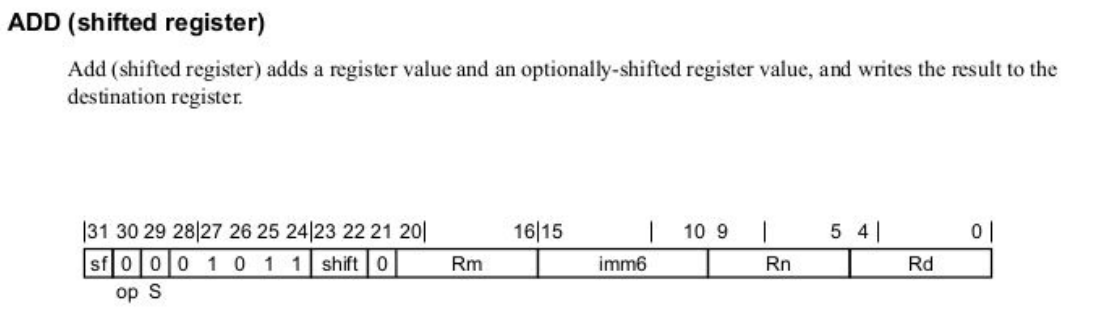

La imagen muestra el formato de la instruccion 'ADD' (shifted register) en la arquitectura ARMv8. 

Campos de la instruccion

1- sf (bit 31): Este es el bit de tamanio del registro:
- 0 indica una operacion de 32 bits.
- 1 indica una operacion de 64 bits.

2- op (bit 30): Determina si la operacion es una suma ('ADD') o una resta ('SUB'):

- 0 para 'ADD'
- 1 para 'SUB'

3- S (bit 29): Es el bit de actualizacion de los flags del procesador (condicion):

- 0 para actualizar los flags.
- 1 actauliza los flags (esto se usa si queres que la operacion afecte los flags de condicion como Z, N, C y V)

4- Shift (bits 23-22): Este campo especifica el tipo de desplazamiento que se aplicara al valor del regsitro rm:

- 00: LSL (Logical Shift Left)
- 01: LSR (Logical Shift Right)
- 10: ASR (Arithmetic Shift Right)
- 11: ROR (Rotate Right)

5- Rm (bits 20-16): Es el registro fuente que se utilizara como segundo operando, el cual sera desplazado segun el campo shift y el varlo en imm6.

6- imm6 (bits 15-10): Es un valor inmediato de 6 bits que indica cuantos lugares se debe desplazar el registro Rm antes de realizar la operacion de suma o resta.

7- Rn (bits 9-5): Es el regsitro fuente que se utilizara como primer operando en la operacion de suma o resta.

8- Rd (bits 4-0): Es el registro destino donde se almacenara el resultado de la operacion.

Resumen de la operacion:

La instruccion 'ADD (shited register)' en ARMv8 suma el valor del registro Rn con el valor del regsitro Rm despues de que este ha sido desplazado segun las especificaciones en los campos 'shift' e 'imm6'. El resutlado de esta operacion se almacena en el registro Rd.

Bit shiffting (desplazamiento de bits) es una operacion que mueve los bits en una secuencia binaria hacia la izquierda o hacia la derecha. Existen varios tipos de desplazamiento de bits, pero los mas comunes son el desplazamiento logico y el desplazamiento aritmetico. 

1- Desplazamiento logico (Logical Shift):

- Desplazamiento a la izquierda (LSL - Logical Shift Left): Los bits se mueven a la izquierda, y los espacios vacios que quedan a la derecha se rellenan con ceros.

Ejemplo: Desplazamiento a la izquierda por 2 posiciones.

Original:    0010 1101  (45 en decimal)
LSL por 2:   1011 0100  (180 en decimal)

En este caso:

- Los bits se desplazaron 2 posiciones a la izquierda

- Los dos espacios vacios a la derecha se llenaron con ceros.

- Propiedades del left shift:

    - Multiplica el numero por 2^n, n siendo el numero de lugares que se deszplaza.

    - Es muy eficiente para el CPU, O(1)

    - Funciona mientras el resultado entre (por ejemplo (4) 0100 en un int de 4 bits se convierte en (-8) 1000 porque no entra (overflow))

    - Se le agrega un cero en el lugar desplazador

- Desplazamiento a la Derecha (LSR - Logical Shift Right): Los bits se mueven a la derecha, y los espacios vacios que quedan a la izquierda se rellenan con ceros.

Ejemplo: Desplazamiento a la derecha por 2 posiciones

    - Original: 0010 1101 
    - LSR por 2: 0000 1011

En este caso:

    - Los bits se desplazaron 2 posiciones a la derecha
    - Los dos espacios vacios a la izquierda se llenaron con ceros.




2- Desplazamiento Aritmetico (Arithmetic Shift)

- Desplazamiento Aritmetico a la Derecha (ASR - Arithmetic Shft Right): Similar al desplazamiento logico a la derecha, pero en lugar de rellenar con ceros, se conserva el bit mas significativo (el bit de signo en numeros con signo). Esto es util para mantener el signo de un numero al dividrlo por potencias de 2.

- Ejemplo: Desplazamiento aritmetico a la derecha por 2 posiciones.

    - Original: 1010 1101 
    - ASR por 2: 1110 1011

- Propiedades de (arithmetic) right shifts (x >> n):

    - Divide por 2^n, n siendo la cantidad de lugares desplazados
    - El resultado es truncado, entonces hace floor para abajo.
        - Osea 7 >> 1 = 3
        - Pero -7 >> 1 = -4 (por que -4 es menor que -3)
        - Y -1 >> 1 == -1 (1111 >> 1 == 1111, redondea para abajo).
    - Se puede castear un int a uint para cambiar la operacion a logica.

Aca:

    - Los bits se desplazaron 2 posiciones a la derecha

    - Los dos espacios vacios a la izquierda se rellenaron con el bit de signo original (1, en este caso).

- Desplazamiento aritmetico a la izquierda (ASL - Arithmetic Shift Left): Es lo mismo que un desplazamiento logico a la izquierda (LSL) y no cambia el bit de signo

Ejemplo:

    - Original:    1010 1101  (número negativo en representación de complemento a 2, -83 en decimal)
    - ASL por 2:   1011 0100  (-180 en decimal)



3- Rotacion de bits (Rotate)

- Rotacion a la derecha (ROR - Rotate Right): Los bits se desplazan a la derecha, y los bits que "salen" del extremo derecho se vuelven a insertar en el extremo izquierdo.

Ejemplo: Rotacion a la derecha por 2 posiciones


    - Original:    0010 1101  (45 en decimal)
    - ROR por 2:   0100 1011  (75 en decimal)

Aca:

Los bits desplazados a la derecha (1 y 1 en este caso) se insertan nuevamente desde la izquierda.

Arithmetic vs Logical:

1- Desplazamientos en C:

- Desplazamiento Logico (Logical Shift):

    - Se aplica a tipos sin signo (unsigned int, unsigned long, etc).
    - Los bits se desplazan hacia la izquierda o hacia la derecha y los espacios vacios se rellenan con ceros.

- Desplazamiento Aritmertico (Arithmetic Shift):

    - Se aplica a tipos con signo (int, long, etc).
    - En un desplazamiento a la derecha, el bit mas significativo (el bit de signo) se replica para mantener el signo del numero. Esto no afecta los desplazamientos a la izquierda, que funcionan igual que el desplazamiento logico.

2- Desplazamiento a la izquierda:

- Tanto en desplamazmientos logicos como aritmetico, el desplazamiento a la izquierda desplaza los bits a la izquierda y llena los espacios vacios a la derecha con ceros.

- Esto significa que ambos tipos de datos (con signo y sin signo), el resultado de un desplazamiento a la izquierda es el mismo.

3- Cambiar el comportamiento del desplazamiento:

- Casteo (casting): Se puede cambiar el comportamiento de un desplazmiento de bits simplemente cambiando el tipo de la variable mediante un cast.

- Por ejemplo, si tienes un int (con signo) y deseas aplicar un desplazamiento logico en lugar de un desplazamiento aritmetico, se puede castear el int a un unsigned int antes de aplicar el desplazamiento.

Ejemplo:

int a = -8;           // -8 en binario (int con signo): 11111111 11111111 11111111 11111000
int b = a >> 2;       // Desplazamiento aritmético: 11111111 11111111 11111111 11111110 (b = -2)
unsigned int c = (unsigned int)a >> 2; // Casteo a unsigned: 00111111 11111111 11111111 11111110 (c = 1073741822)

- Sin casteo (int b = a >> 2;): Realiza un desplazamiento aritmético manteniendo el bit de signo (los bits de la izquierda se rellenan con 1 si el número es negativo).

- Con casteo (unsigned int c = (unsigned int)a >> 2;): Al castear a un tipo sin signo, el desplazamiento se realiza de manera lógica, llenando con ceros en la izquierda.

Resumen:

- C automáticamente elige el tipo de desplazamiento según el tipo de dato (signo para aritmético, sin signo para lógico).

- Desplazamiento a la izquierda produce el mismo resultado tanto para tipos con signo como sin signo.

- Puedes cambiar el tipo de una variable mediante un casteo para alterar el comportamiento del desplazamiento (aritmético a lógico y viceversa).


Las banderas (flags) de condicion son parte de los registros de estado en muchas arquitecturas de procesadores, incluyendo ARM y x86, y se utilizan para indicar el resultado de operaciones aritmeticas y logicas. Estas banderas permiten que el procesador tome decisiones badas en los resultados de las operaciones.

1- Overflow Flag (O):

- Proposito: Indica que el resultado de una operacion aritmetica con signo (signed) ha excedido el rango que puede representarse con el numero de bits disponibles.

- Ejemplo: Si estás trabajando con enteros de 8 bits, el rango de números con signo es de -128 a 127. Si sumas dos números que deberían dar un resultado fuera de este rango (por ejemplo, 100 + 50), el resultado no puede representarse correctamente en 8 bits, y el flag de overflow se activará.

- Situaciones comunes:
Suma de dos números positivos que da un número negativo.
Resta de dos números negativos que da un número positivo.

2- Carry Flag (C):

- Proposito: Indica que una operacion aritmetica sin signo (unsigned) ha producido un resultado que requiere un bit extra, es decir, que el resultado ha excedido la capacidad del numero de bits disponibles o que se ha producido un "prestamo" en una resta.

- Ejemplo: Si sumas dos números de 32 bits sin signo y el resultado es mayor que 2^32 - 1, el carry flag se activará.

- Diferencia con Overflow:
    - Carry Flag: Relacionado con operaciones sin signo. Indica que hubo un "carry out" del bit más significativo.
    - Overflow Flag: Relacionado con operaciones con signo. Indica que el resultado no cabe en el rango del tipo de dato con signo.

3- Zero Flag (Z):

- Proposito: Indica que el resultado de una operacion es cero.

- Ejemplo: Si restas dos numeros iguales (Por ejemplo, '5 - 5'), el resultado es 0 y el zero flag se activara.

- Uso comun: Se utiliza en condiciones de comparacion para determinar si dos valores son iguales.

4- Negative Flag (N):

- Proposito: Indica que el resultado de una operacion aritmerica o logica es negativo.

- Ejemplo: Si sumas dos numeros y el resultado es un numero negativo en la representacion con signo (por ejemplo, '-5'), el negative flag se activara.

- Detalles: Este flag se basa en el bit mas significativo del resultado en operaciones con signo. En un sistema de 32 bits, si el bit 31 (el bit de signo) es 1, entonces el resultado es negativo y el flag N se activa.

Resumen:

- Overflow Flag (O): Se activa cuando el resultado de una operación con signo no cabe en el rango representable.

- Carry Flag (C): Se activa en operaciones sin signo cuando el resultado es demasiado grande o demasiado pequeño (overflow o underflow).

- Zero Flag (Z): Se activa cuando el resultado de la operación es exactamente 0.

- Negative Flag (N): Se activa cuando el resultado es un número negativo en operaciones con signo.

Estas banderas permiten que el procesador controle flujos de ejecución condicionalmente, lo que es fundamental en la toma de decisiones dentro de programas y sistemas operativos.

Big endian little endian

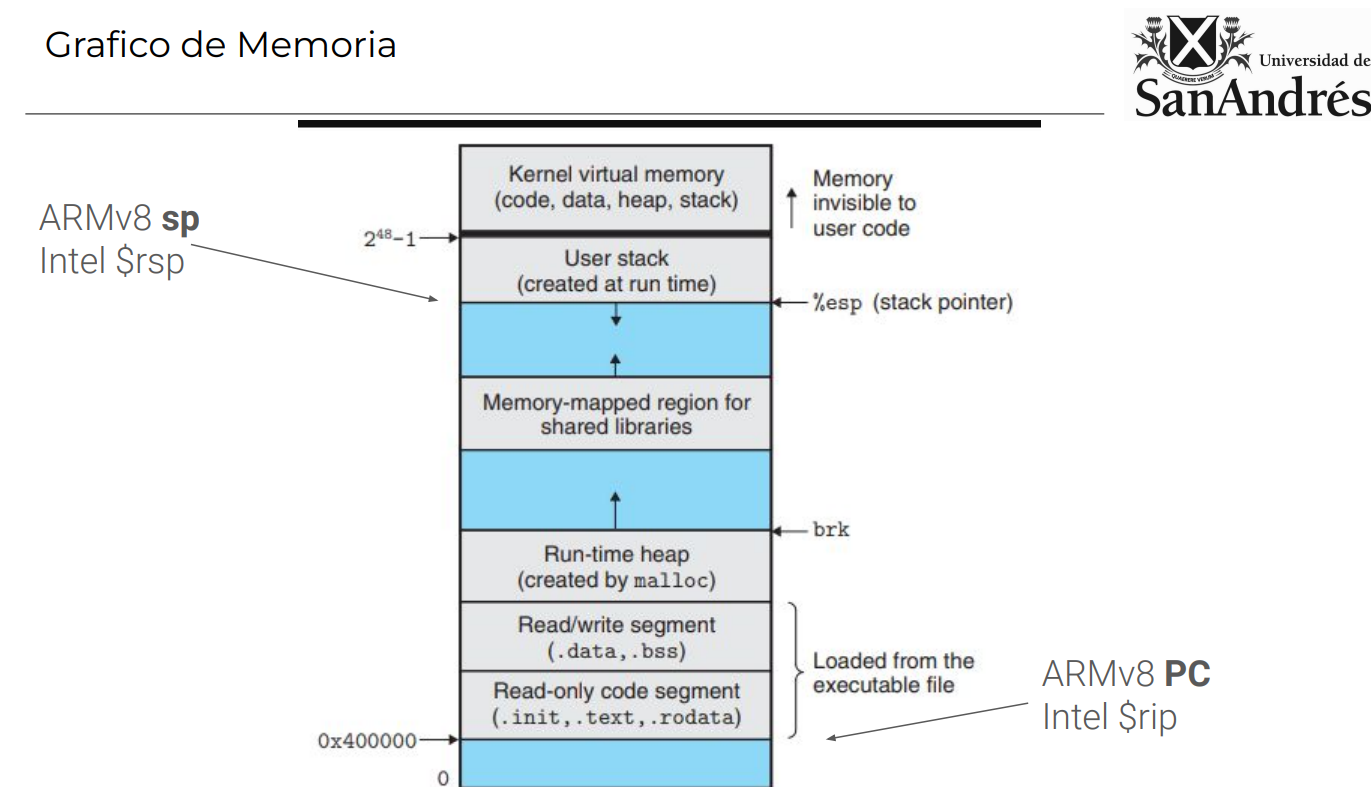

La imagen representa la organizacon de la memoria en un sistema de computacion comparando las arquitecturas ARMv8 y x86 (Intel)

1- Grafico de memoria:

- Este grafico muestra como se organiza la memoria virtual en un sistema operativo moderno. La memoria virtual es un espacio de direcciones que el sistema operativo asigna a cada proceso, lo que le da a cada proceso la ilusion de tener todo el espacio de memoria disponible para el solo.

2- Segmentos de memoria:

- Kernel Virtual Memory (Memoria Virtual del Kernel):

    - Es la parte superior de la memoria que esta reservada para el kernel del sistem operativo
    
    - Esta memoria es invisible para el codigo de usuario, lo que significa que los programas normales no puede acceder directamente a esta area.

    - El kernel gestiona los recursos y la seguridad del sistema, y su memoria incluye codigos, datos, heap y stack especifico para el kernel.

- User Stack (pila de usuario)

    - Justo debajo de la memoria del kernel esta la pila del usuario

    - La pila es una estructura de datos que almacena informacion como variables locales y direcciones de retorno. Crece desde direcciones altas hacia direcciones bajas en la memoria.

    - En el grafico, la pila se gestiona mediante el Stack Pointer ('sp' en ARMv8 y '$rsp' en intel x86). Este puntero indica la ubicacion actual de la cima de la pila

- Memory-Mapped Region for Shared Libraries (Region Mapeada para Librerias Compartidas):

    - Esta seccion se utiliza para mapear en memoria las librerias compartidas, como las bibliotecas dinamcicas ('.so' en linux o '.dll' en windows).

    - Permite que multiples procesos compartan el mismo codigo en memoria, ahorrando espacio.

- Run-time Heap (Heap en Tiempo de Ejecucion):

    - La heap es la region de memoria utilizada para la asignacion dinamica (por ejemplo, usando 'malloc' en C).

    - Crece desde direcciones bajas hacia direcciones altas.

    - El puntero 'brk' gestiona el limite superior de la heap

- Read/Write Segment (Segmento de lectura/escritura):

    - Incluye las secciones '.data' y '.bss'.

    - '.data': Contiene las variables globales y estaticas inicializadas.

    - '.bss': Contiene las variables globales y estaticas no inicializadas.

    - Estas secciones permiten la lectura y escritura, a diferencia del codigo, que solo es de lectura.

- Read-only Code Segment (Segmento de Codigo de Solo Lectura):

    - Incluye las secciones '.init', '.text' y '.rodata'.

    - '.text': Contiene el codigo ejecutable del programa

    - '.rodata': Contiene datos de solo lectura, como las cadenas constantes.

3- Punteros importantes:

- ARMv8 'sp' (Stack Pointer) / Intel '$rsp':
    
    - Este puntero indica la posicion actual de la cima de la pila

    - En ARMv8, se denomina 'sp', mientras que en intel x86, es '$rsp'.

- ARMv8 'pc' (Program Counter) / Intel '$rip':
    
    - El Program Counter (PC), llamado '$rip' en x86, es un registro que guarda la direccion de la siguiente instruccion a ejecutar.

    - Este punteor se mueve a medida que el programa avanza, indicando la ubicacion en la memoria de la instruccion actual.

4- Direcciones de Memoria:

- El grafico muestra la direccion de memoria mas baja en la parte inferior (0x400000 en este caso), que es donde se carga el archivo ejecutable.

- Las direcciones aumentan hacia arriba, donde se encuentra la memoria del kernel.

Resumen:

Este gráfico proporciona una visión general de cómo está estructurada la memoria en un sistema que ejecuta programas bajo un sistema operativo. La memoria está dividida en secciones específicas para código, datos, heap, y pila. Los punteros sp y PC ($rsp y $rip en x86) son registros importantes que controlan la ejecución del programa y la gestión de la pila. Cada arquitectura, ya sea ARMv8 o Intel, tiene sus propios registros y convenciones, pero la organización general de la memoria es bastante similar.

C se compila a Assembly:

- Lenguaje C: C es un lengaje de programacion de alto nivel que permite escribir programas de forma relativamente abstracta y portatil. Sin embargo, para que un porgrama en C se ejecute en una maquina, debe ser traducido a un lenguaje que la maquina pueda entender directamente.

- Compilacion: El proceso de compilacion traduce el codgio fuente escrito en C a codigo en ensamlador (assembly), que es un lenguaje de bajo nivel, mucho mas cercano al codigo de maquina.

- Assembly: El codigo en ensamblador es una representacion textual de las instrucciones que la CPU ejecutara. Cada instruccion en ensamblador corresponde generalmente a una instruccion de maquina, que es un conjunto especifico de codigos binarios que la CPU puede ejecutar directamente.

- Codigo maquina: Finalmente, el ensamblador (un pograma que forma aprte del proceso de compilacion) traduce las instrucciones de assembly a codigo de maquina, que son instrucciones en formato binario que la CPU entiende y ejecuta directamente.

Instrucciones de Assembly y la Maquina de Turing

- Maquina de Turing: La maquina de Turing es un concepto teorico en la computacion que describe un dispositivo abstracto que puede realizar calculos siguiendo una serie de reglas definidas. Es un modelo matematico de computacion que captura la idea de lo que es computable. La maquina de Turing trabaja con una cinta infinita y un conjunto de estados y reglas que determinan las operaciones que realiza.

- Assembly y Maquinas Reales: Las instrucciones en ensamblador corresponden a operaciones que una CPU real puede realizar, como cargar datos en registros, sumar valores, realizar saltos condicionales, etc. Estas operaciones son mucho mas concretas y estan disenadas para el hardware especifico en el que se ejecutan.

- Relacion con la Maquina de Turing: Una CPU real, al ejecutar codigo en ensamblador (y por ende, codigo de maquina), puede simular cualquier computacion que una maquina de Turing pueda realizar, siempre que se le de suficiente tiempo y memoria. En otras palabras, una CPU es una implementacion practica y concreta de los principios de la computacion que describe la maquina de turing.



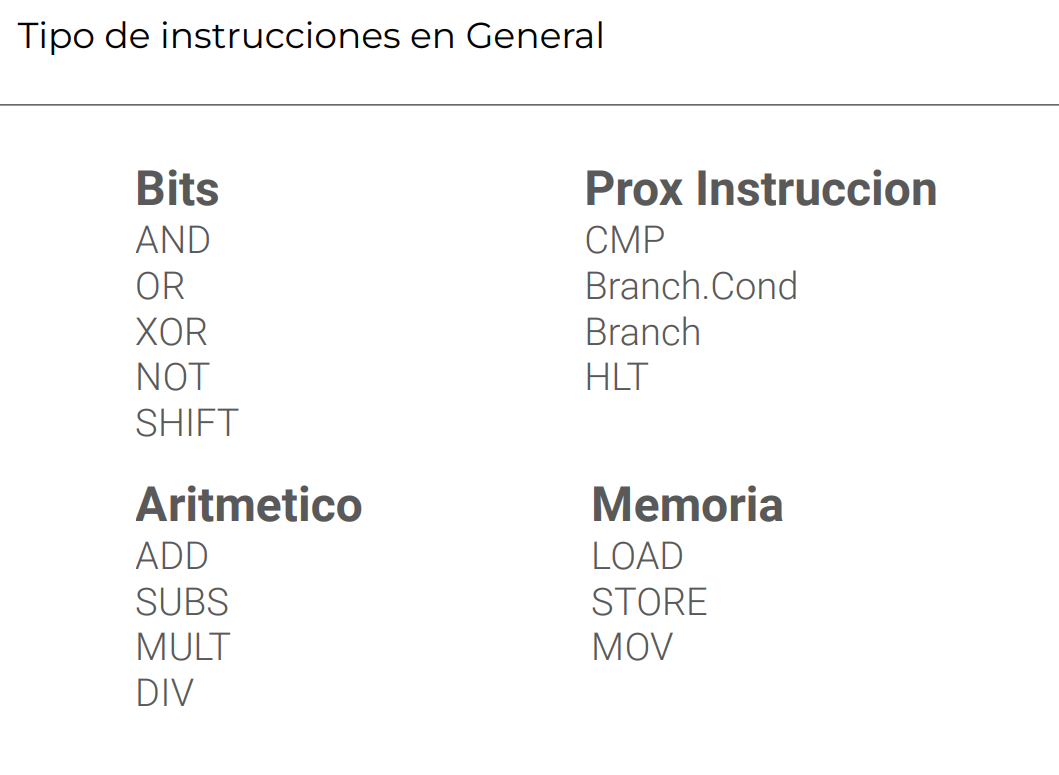

1- Instrucciones de Bits:

Estas instrucciones operan directamente sobre los bits individuales dentro de un registro o una palabra de datos. Son fundamentales para manipular datos a bajo nivel y controlar el hardware.

- AND: Realiza una operación lógica AND bit a bit entre dos operandos. Solo se establece un bit en el resultado si los bits correspondientes en ambos operandos son 1.

- OR: Realiza una operación lógica OR bit a bit. Un bit en el resultado se establece si al menos uno de los bits correspondientes en los operandos es 1.

- XOR: Realiza una operación lógica XOR bit a bit. Un bit en el resultado se establece si los bits correspondientes en los operandos son diferentes.

- NOT: Realiza una operación lógica NOT, invirtiendo todos los bits del operando.

- SHIFT: Desplaza los bits de un operando a la izquierda o a la derecha. Puede ser lógico (rellenando con ceros) o aritmético (preservando el bit de signo en desplazamientos a la derecha).

2- Instrucciones Aritmeticas:

Estas instrucciones realizan operaciones matemáticas básicas. Son esenciales para cualquier cálculo o procesamiento de datos.

- ADD: Suma dos operandos y almacena el resultado.

- SUBS: Resta un operando de otro. En ARMv8, "SUBS" también puede actualizar las banderas de condición.

- MULT: Multiplica dos operandos y almacena el resultado.

- DIV: Divide un operando por otro y almacena el cociente.

3- Instrucciones de Memoria

Estas instrucciones son responsables de mover datos entre registros y la memoria, lo cual es crucial para la manipulación de datos en la ejecución de programas.

- LOAD: Carga un valor desde una dirección de memoria en un registro.

- STORE: Almacena el valor de un registro en una dirección de memoria.

- MOV: Mueve o copia datos de un registro a otro. Puede también implicar mover datos de memoria a un registro o viceversa.

4- Instrucciones de control de flujo (Prox Instruccion)

Estas instrucciones controlan la secuencia de ejecución de un programa, permitiendo saltos condicionales y bucles.

- CMP: Compara dos valores y establece las banderas de condición sin almacenar el resultado.

- Branch.Cond: Realiza un salto a otra parte del código si se cumple una condición específica (por ejemplo, si una comparación previa resultó en igualdad).

- Branch: Realiza un salto incondicional a otra parte del código.

- HLT: Detiene la ejecución del programa o pone la CPU en un estado de espera.

Resumen:

Este tipo de clasificación de instrucciones es común en la programación en ensamblador y describe las operaciones fundamentales que una CPU puede realizar. Cada tipo de instrucción sirve para un propósito específico, desde manipular bits individuales, realizar cálculos aritméticos, mover datos entre memoria y registros, hasta controlar la ejecución del programa. Las instrucciones de bits y aritméticas permiten el procesamiento directo de datos, mientras que las instrucciones de memoria y de control de flujo permiten organizar y ejecutar el programa de manera efectiva.

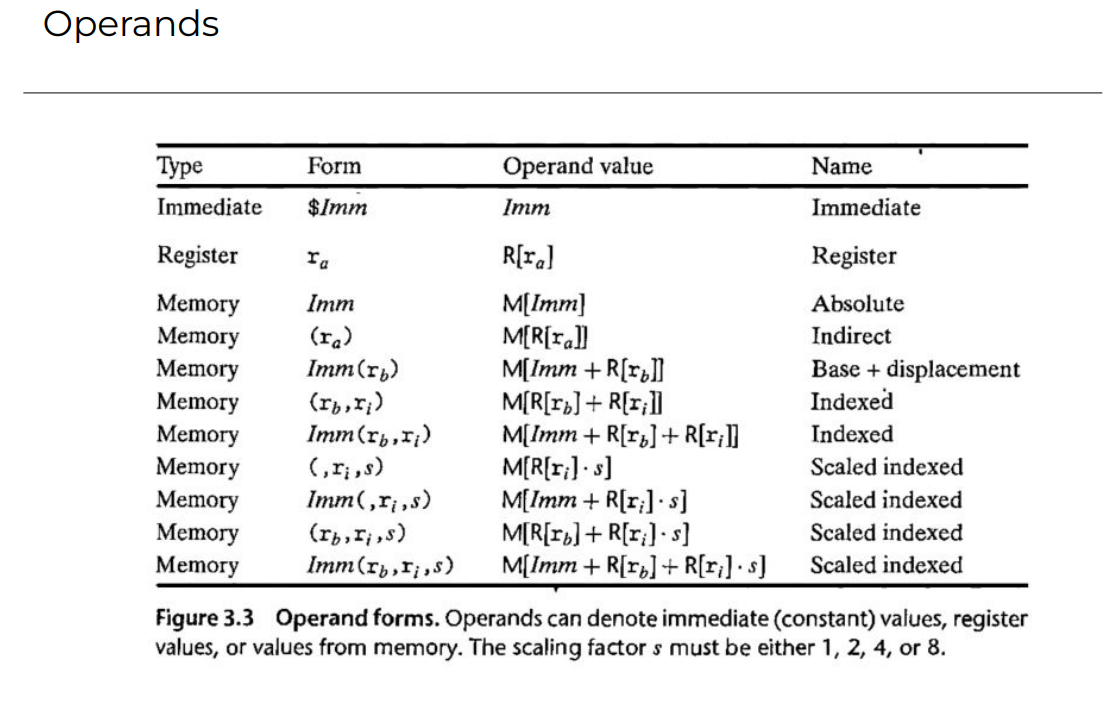

RISC VS CISC

RISC (Reduced Instruction Set Computer)

- Instrucciones basicas:

    - La arquitectura RISC estan diseniada con un conjunto de instrucciones reducido y simple. Cada instruccion realiza una operacion muy basica, como una suma o un desplazamiento de bits.

- Acceso a memoria limitado a Load/Store:

    - En RISC, la unica manera de interactuar con la memoria es mediante instrucciones de carga ('LOAD') y almacenamiento ('STORE'). Todas las demas operaciones (suma, resta, etc) se realizan unicamente entre registros, no directamente en memoria.

- Ejemplo: ARMv8:

    - ARMv8 es una arquitectura RISC moderna que es muy utilizada moviles y embebidos. Es eficiente y de baja potencia, aprovechando las ventajas de la simplcidad del disenio RISC.

- Instrucciones del mismo tamanio:

    - En una arquitectura RISC, todas las instrucciones generalmente tiene el mismo tamanio (por ejemplo, 32 bits). Esto simplifica el proceso de "fetch" (recupeeracion), "decode" (decodificacion), y "execute" (ejecucion) dentro de la CPU, ya que el hardware puede manejar todas las instrucciones de manera uniforme.

- Mas instrucciones para hacer lo mismo, pero mas simple y rapidas:

    - Aunque las arquitecturas RISC pueden requerir más instrucciones para completar una tarea compleja (en comparación con CISC), cada instrucción es rápida y eficiente. La idea es que la simplicidad de las instrucciones permita una ejecución más rápida, y la optimización del tiempo se logra mediante la velocidad de estas instrucciones simples.


CISC (Complex Instruction Set Computer)

- Instrucciones sofisticadas:

    - En las arquitecturas CISC, las instrucciones son más complejas y pueden realizar múltiples operaciones en una sola instrucción. Por ejemplo, una sola instrucción puede cargar datos desde la memoria, realizar una operación aritmética y almacenar el resultado de nuevo en la memoria.

- Instrucciones con acceso a memoria integrado:

    - A diferencia de RISC, en CISC, las instrucciones pueden interactuar directamente con la memoria sin necesidad de pasar primero por los registros. Esto puede hacer que algunas operaciones sean más rápidas en términos de número de instrucciones necesarias.

- Ejemplo: x86:

    - La arquitectura x86, introducida por Intel, es un ejemplo clásico de CISC. Es muy utilizada en computadoras personales y servidores. La x86 tiene una larga historia y ha evolucionado considerablemente, pero sigue siendo una arquitectura CISC en su núcleo.

- Instrucciones de diferentes tamaños:

    - En CISC, las instrucciones pueden tener diferentes longitudes (en bits), lo que añade complejidad al proceso de "fetch" y "decode". La CPU debe ser capaz de manejar instrucciones de longitud variable, lo que puede requerir más circuitería y diseño más complejo.

Comparación General

- Simplicidad vs. Complejidad:

    - RISC: Busca la simplicidad en el diseño, lo que facilita la optimización y permite una ejecución rápida de instrucciones simples.

    - CISC: Prioriza la complejidad en las instrucciones individuales, permitiendo que una sola instrucción realice tareas complejas, a menudo reduciendo el número de instrucciones necesarias para realizar una tarea.

- Eficiencia:

    - RISC: Es eficiente en términos de velocidad por instrucción, aprovechando pipelines y otras optimizaciones modernas de CPU.
    
    - CISC: Es eficiente en términos de reducir el número de instrucciones, pero cada instrucción puede tomar más ciclos de reloj para completarse debido a su complejidad.

- Uso práctico:

    - RISC: Encontrado en sistemas donde la eficiencia y el bajo consumo de energía son críticos, como en dispositivos móviles y embebidos (ARMv8, por ejemplo).

    - CISC: Común en sistemas donde la compatibilidad hacia atrás y la capacidad de manejar tareas complejas con menos código es importante, como en PCs y servidores (x86).


ARMv8

ARMv8 es una arquitectura de procesador desarrollada por ARM Holdings, que es una de las familias de arquitecturas de procesadores más utilizadas en el mundo, especialmente en dispositivos móviles y sistemas embebidos. A continuación te explico los aspectos más importantes de ARMv8:

1- Evolucion y Caracteristicas Principales

- Arquitectura ARM: ARM (Advanced RISC Machine) es una familia de arquitecturas de procesadores basadas en el conjunto de instrucciones RISC (Reduced Instruction Set Computer). ARM se caracteriza por su eficiencia energética, lo que la hace ideal para dispositivos como smartphones, tablets, dispositivos IoT, y más.

- ARMv8: Es la octava versión principal de la arquitectura ARM, lanzada en 2011. Es una evolución de las versiones anteriores (como ARMv7), e introduce características importantes, como soporte para instrucciones de 64 bits.

2- Soporte para 64 bits

- AArch64: ARMv8 introduce un nuevo modo de ejecución llamado AArch64, que permite que los procesadores ejecuten instrucciones de 64 bits. Esto permite manejar más memoria (más de 4 GB) y realizar operaciones con datos más grandes de manera más eficiente.

- AArch32: Aunque ARMv8 es principalmente conocido por su soporte de 64 bits, también mantiene compatibilidad con instrucciones de 32 bits a través del modo AArch32, lo que permite ejecutar código diseñado para versiones anteriores de ARM (como ARMv7).

3- Nuevos registros y conjunto de instrucciones

- Registros de 64 bits: ARMv8 tiene 31 registros de propósito general (X0 a X30), cada uno de 64 bits de ancho, lo que permite operaciones con datos más grandes.

- Conjunto de Instrucciones: ARMv8 amplía el conjunto de instrucciones, incluyendo instrucciones específicas para operaciones de 64 bits, mientras mantiene las características de RISC, como instrucciones simples y uniformes.

4- Ventaja y Usos

- Eficiencia Energética: Una de las mayores ventajas de ARMv8, como todas las arquitecturas ARM, es su eficiencia energética, lo que la hace ideal para dispositivos móviles que necesitan ahorrar batería.

- Rendimiento: Al soportar 64 bits, ARMv8 permite un mayor rendimiento en aplicaciones que requieren procesar grandes cantidades de datos o manejar grandes espacios de memoria, como en servidores y dispositivos de alta gama.

- Compatibilidad: ARMv8 es compatible con software desarrollado para arquitecturas anteriores de ARM, lo que facilita la transición de 32 a 64 bits sin perder compatibilidad con aplicaciones existentes.

5- Aplicaciones comunes

- Dispositivos Móviles: La mayoría de los smartphones y tablets modernos utilizan procesadores basados en ARMv8 debido a su equilibrio entre rendimiento y eficiencia energética.

- Servidores y Computación en la Nube: ARMv8 también se está utilizando en centros de datos y servidores, donde su capacidad para manejar grandes cantidades de datos con eficiencia energética es una gran ventaja.

- Dispositivos Embebidos: Desde routers hasta dispositivos IoT, ARMv8 se utiliza en una amplia gama de dispositivos embebidos debido a su flexibilidad y eficiencia.

Resumen

ARMv8 es una arquitectura moderna y eficiente que lleva la arquitectura ARM a la era de 64 bits, proporcionando más capacidad de procesamiento y manejo de memoria, manteniendo su tradicional eficiencia energética. Su versatilidad y compatibilidad con versiones anteriores han hecho de ARMv8 una opción popular en una amplia gama de dispositivos, desde smartphones hasta servidores.


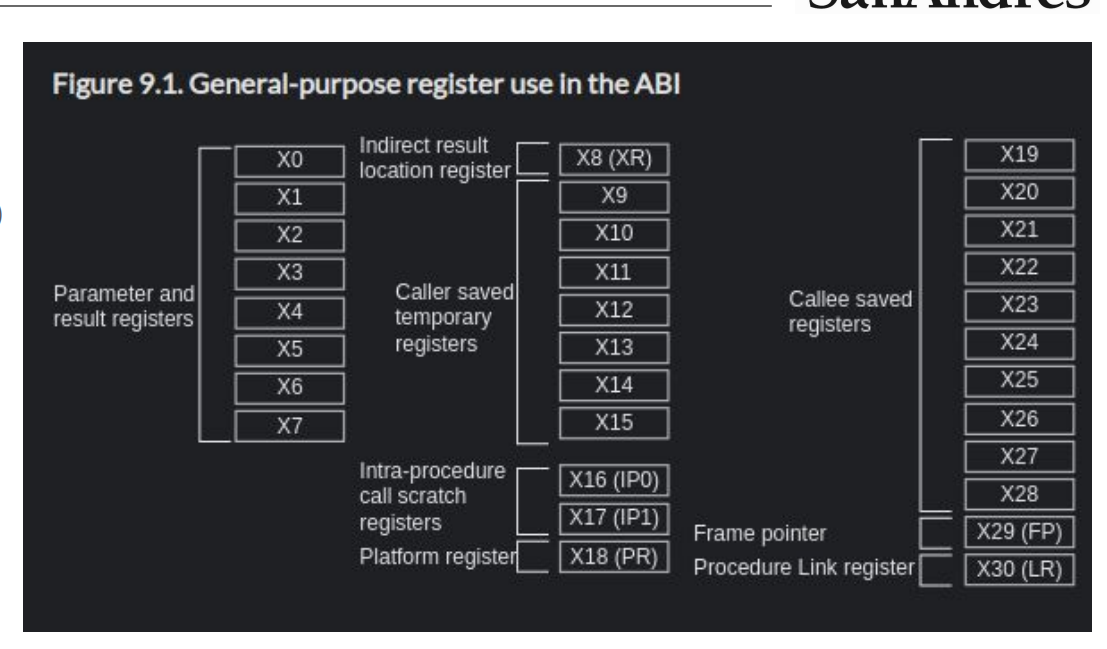

La imagen muestra la disposicion y el uso de los registros de proposito general en la arquitectura ARMv8 de 64 bits.

1- Registros de Proposito General (General-Purpouse Registers)

- ARMv8 tiene 31 registros de 64 bits de propósito general, numerados de X0 a X30.

- El registro X31 no se muestra aquí porque se considera el registro cero (denotado a menudo como ZR). Este registro siempre contiene el valor 0 y se utiliza cuando se necesita un valor cero constante.

2- Tipos de Registros

Los registros de propósito general en ARMv8 se utilizan para diferentes propósitos según las convenciones del ABI (Application Binary Interface), que define cómo se utilizan estos registros en la llamada a funciones y en la gestión de la pila. Aquí hay una descripción de cada grupo de registros:

- Parameter and Result Registers (X0 - X7):

    - Estos registros se utilizan para pasar parámetros a las funciones y también para devolver los resultados.

    - Por ejemplo, cuando llamas a una función que suma dos números, los operandos se pueden pasar a través de X0 y X1, y el resultado se devuelve en X0.

- Caller Saved Temporary Registers (X8 - X15):

    - También conocidos como registros volátiles o temporales.

    - Si una función necesita utilizar estos registros, debe guardar (salvar) su contenido en la pila antes de usarlos y restaurarlo antes de devolver el control.

    - X8 es especialmente importante porque se usa como registro para devolver ubicaciones indirectas de resultados, conocido como XR (indirect result location register).

- Callee Saved Registers (X19 - X28):

    - Estos registros deben ser preservados por la función llamada. Es decir, si una función utiliza estos registros, debe asegurarse de que su valor original se restaure antes de que la función termine.

    -Estos registros se utilizan a menudo para almacenar variables locales o resultados intermedios que deben persistir durante la ejecución de la función.

- Special Registers:

    - Frame Pointer (FP) - X29:

        -Utilizado para mantener la base del marco de la pila (stack frame). Ayuda en la creación de marcos de pila que se utilizan para rastrear las llamadas de función y acceder a los parámetros y variables locales.

    - Link Register (LR) - X30:

        - Almacena la dirección de retorno cuando se hace una llamada a función. Es el registro donde se guarda la dirección a la que se debe regresar cuando una función termina su ejecución.

- IP0/IP1/PR (X16, X17, X18):

    Estos registros se utilizan como registros temporales o de plataforma (Platform register). X16 y X17 son a menudo utilizados para llamadas a funciones indirectas y otras operaciones de trampolín, mientras que X18 puede ser utilizado por el sistema operativo o en algunas convenciones ABI para almacenamiento especial.

3- Program Counter (PC)

No se muestra explícitamente en el diagrama, pero ARMv8 también tiene un Program Counter (PC) que es un registro especial que apunta a la dirección de la próxima instrucción a ejecutar.

4- Stack Pointer (SP)

El Stack Pointer (SP), aunque no se muestra en este diagrama, es otro registro crítico que apunta a la parte superior de la pila actual. Se utiliza para gestionar la memoria de la pila, donde se almacenan variables locales, marcos de pila, direcciones de retorno, etc.

Resumen:

- ARMv8 de 64 bits tiene 31 registros de propósito general (X0 a X30).

- X31 es el registro cero que siempre contiene 0.

- Los registros se dividen en diferentes grupos según su función en las llamadas a funciones y la gestión de la pila.

- Además, existen registros especiales como el FP (Frame Pointer), LR (Link Register) y registros temporales (IP0, IP1, PR).

- El Program Counter (PC) y el Stack Pointer (SP) son registros esenciales para la ejecución y gestión de la pila, respectivamente.



Proceso de compilacion:

El proceso de desarrollo de compilacion y enlazado en un entorno de programacion generalmente involucra varios pasos para transformar el codigo fuente en un programa ejecutable.

1- Escritura del codigo fuente:

- El primer paso es escribir el codigo en un lenguaje de programacion como C, C++, Java, etc. Este codigo es legible para los humanos y contiene las instrucciones que el programa seguira.

2- Preprocesamiento (Solo en algunos lenguajes como C/C++):

- Preprocesador: Antes de la compilacion, el preprocesador analiza las directivas del preprocesador, como #include, #define, etc. Y realiza sustituciones textuales. Genera un archivo de codigo fuente expandido.

3- Compilacion:

- Compilador: El codigo fuente (o el codigo fuente preprocesado) se convierte en un codigo objeto (o codigo de maquina) especifico para la arquitectura del sistema. Este codigo objeto es un codigo binario que no es ejecutable directamente pero esata en un formato que la maquina puede entender.

4- Ensamblado:

- Ensamblador: En algunos casos, el codigo objeto puede pasar por una fase de ensamblado en la que se convierte en codigo de ensamblaje, que es un paso intermedio antes de la generacion del codigo maquina. Finalmente, se produce un archivo objeto.

5- Enlazado

- Enlazador: El enlazador toma uno o mas archivos objeto generales por el compilador y los combina en un solo archivo ejecutable. En esta fase, el enlazador tambien resuelve las referencias a funciones y variables que se encuentran en diferentes archivos objeto. Si se estan utilizando bibliotecas externas, estas tambien se incluyen durante el proceso de enlazado.

6- Generacion del ejecutable

- El resultado final del enlazador es un archivo ejecutable que puede ser ejecutado en el sistem operativo del objetivo.

7- Cargando el programa

- Cargador: CUando se ejecuta el programa, el sistema operativo utiliza un cargador para cargar el ejecutable en la memoria y asignar los recursos necesarios para su ejecucion.

8- Ejecucion

- Finalmente, el programa se ejecuta siguiendo las instrucciones que has escrito originalmente en el codigo fuente.

Proceso de compilacion y enlazado en C

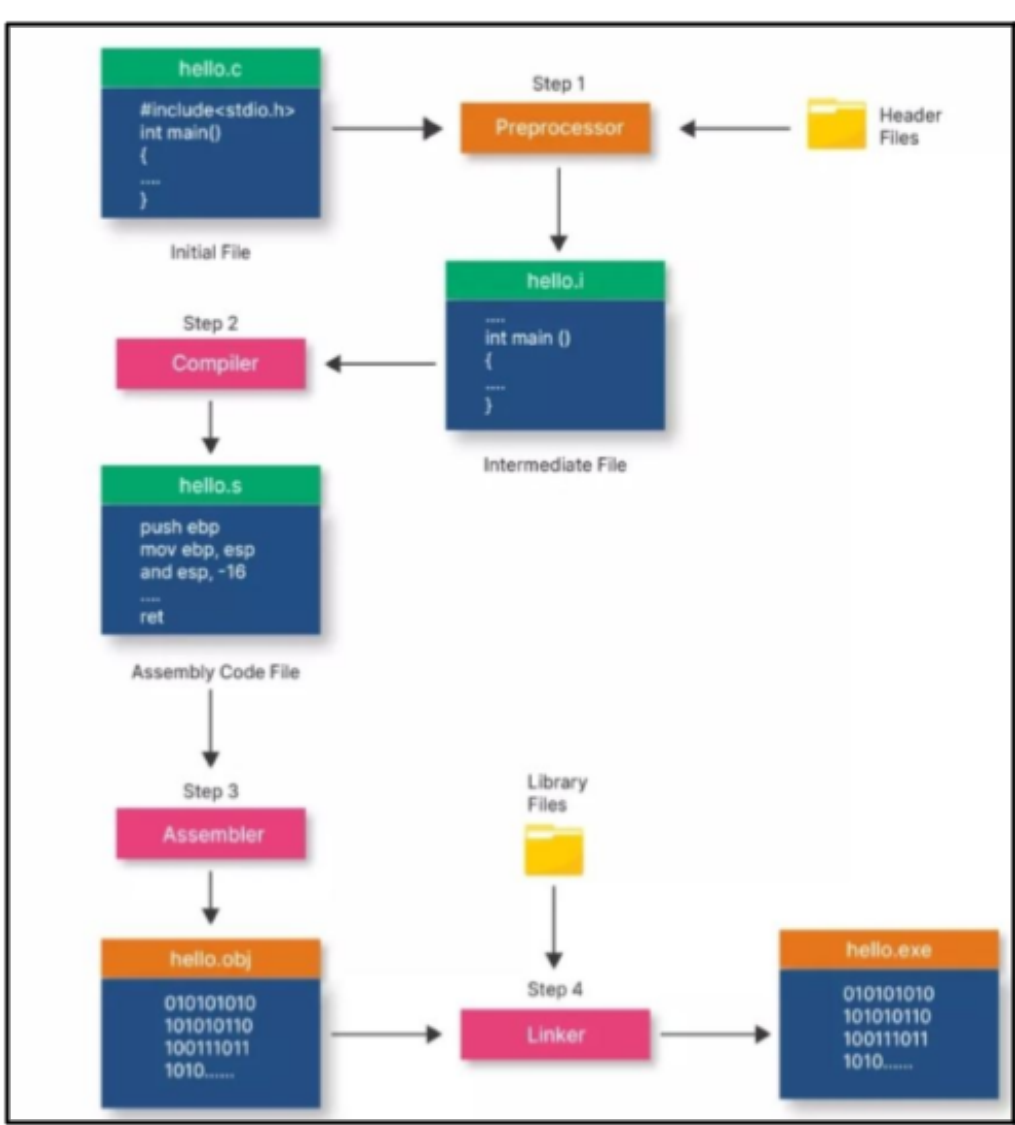

1- Preprocesador:

- El archivo fuente hello.c pasa por el preprocesador, donde se expanden las directivas de preprocesador como #include, #define, etc. El resultado es un archivo intermedio (hello.i) que contiene el codigo despues de la expansion de macros y la inclusion de los archivos de cabecera.

2- Compilador:

- El archivo intermedio (hello.i) se pasa al compliador, que traduce el codigo C a codigo ensamblador, generando un archivo de codigo ensamblador (hello.s) este archivo contiene instrucciones en un lenguaje de bajo nivel que la maquina puede entender mas facilmente.

3- Ensamblador:

- El codigo ensamblador (hello.s) es procesador por el ensamblador, que lo convierte en un archivo objeto (hello.obj). Este archivo contiene codigo binario pero no es ejecutable por si solo, ya que podria necesitar otros archivos objeto o bibliotecas para funcionar correctamente.

4- Enlazador:

- El enlazador toma el archivo objeto (hello.obj) y lo combina con otros archivos objeto y bibliotecas necesarias, resolviendo las referencias entre ellos. El resultado es un archivo ejecutable (hello.exe), que puede ser ejecutado directamente en la maquina.

Preprocesador en C

El preprocesador en C es una etapa clave en el proceso de compilacion, que se encarga de preparar el codigo fuente antes de que sea compilado por el compilador. Esta etapa se realiza antes de la compilacion propiamente dicha y consiste en ejecutar una sere de instrucciones conocidas como directivas del preprocesador.

1- Sustitucicon de Macros:

- Definicion y uso de macros: Los macros son fragmentos de codigo definidos mediante la directiva #define. Un macro puede ser un simple valor, como una constante, o un fragmento de codigo que se expande cuando se usa en el codigo fuente.

- Ejemplo:

#define PI 3.14159
#define SQUARE(x) ((x) * (x))

En este ejemplo, PI se reemplaza por 3.14159 en todo el codigo, y square(x) se expande a ((x) * (x)) donde se use. Esto facilita el uso de valores y calculos repetidos sin tener que escribirlos varias veces, reduciendo errores y manejando la mantenibiilidad del codigo.

2- Inclusion de archivos

- Incorporacion de contenido externo: El preprocesador permite incluir el contenido de otros archivos en el codigo fuente medainte las directvias #include. Esto es comunmente utilizado para incluir archivos de encabezado (.h) que contienen declaraciones de funciones, definiciones de macros, y otras estructuras de datos que se usan en varios archivos fuente.

#include <stdio.h>
#include "mi_header.h"

En este caso, el preprocesador reemplaza #include <stdio.h> con el contenido del archivo stdio.h, que es parte de la biblioteca estandar de C, y #include "mi header.h" con el contenido de un archivo de encabezado definido por el usuario.

3- Directivas condicionales:

- Compilacion condicional: Las directivas condicionales permiten que se compile o no ciertas partes del codigo segun ciertas condiciones, como si una macro esta definida o no, o basandose en expresiones logicas. Esto es util para crear codigo que se pueda adaptar a diferentes plataformas o configuraciones.

#ifdef DEBUG
#define LOG(x) printf("LOG: %s\n", x)
#else
#define LOG(x)
#endif

Aquí, si la macro DEBUG está definida, LOG(x) imprimirá un mensaje de registro. Si no está definida, LOG(x) no hará nada. Esto permite que el código de depuración se incluya o se omita según se necesite, sin tener que eliminar manualmente las líneas de código.

4- Eliminacion de comentarios:

- Limpieza del codigo: Durante el preprocesamiento, los comentarios en el codigo fuente (tanto los de una sola linea // como los de multiples lineas /*.....*/) son eliminados. Esto ayuda a mantener el código limpio y más eficiente, ya que los comentarios, que son solo para la comprensión del desarrollador, no son necesarios en el código que se va a compilar.

Resumen:

El preprocesador realiza transformaciones en el código fuente antes de la compilación, tales como la sustitución de macros, la inclusión de otros archivos, la aplicación de directivas condicionales y la eliminación de comentarios. Esto permite que el código sea más modular, legible y adaptable, preparando eficientemente el código fuente para las siguientes etapas del proceso de compilación.

Compilador:

El compilador es una pieza fundamental en el proceso de desarrollo de software, encargado de traducir el codigo fuente escrito en un lenguaje de alto nivel a un lenguaje de bajo nivel o codigo binario que puede ser ejecutado driectamente por la CPU del sistema.

1- Analisis sintactico:

- Analisis del codigo fuente: El compilador comienza leyendo el archivo de texto que contiene el codigo fuente. Realiza un analisis sintactico para asegurarse de que el codigo sigue las relgas gramaticales del lenguaje de programacion utilizado. Este proceso implica descomponerse el codigo de tokens (como palabras clave, identificadores, operadores, etc) y construir una estructura de arbol que represente la estructura logica del programa, conocida como arbol sintactico.

- Errore sintacticos: Si el codigo no sigue la sintaxis correcta, el compilador genera errores que indican al programador donde y que parte del codigo es incorrecta. Estos errores deben ser corregidos antes de continuar con la compilacion.

2- Generacion de codigo binario:

- Traduccion a codigo de maquina: Si el codigo fuente esta redactado correctamente, el compilador traduce el arbol sintactico en instrucciones de maquina especificas para la arquitectura del sistema donde se ejecutara el programa. Este codigo binario es un conjunto de instrucciones que la CPU puede ejecutar directamente. Este proceso incluye la optimizacion del codigo para mejorar el rendimiento del programa final.

- Codigo objeto: El resultado de esta traducción es un archivo objeto (.obj o .o), que contiene el código binario y es la base para generar el ejecutable final después del enlazado.

3- Sustitucion de nombres logicos por direcciones de memoria.

- Asignacion de Direcciones de memoria: Durante la compilación, el compilador sustituye los nombres lógicos utilizados para variables y funciones en el código fuente por sus correspondientes direcciones de memoria en el código objeto. Esto significa que en lugar de referirse a una variable por su nombre, el código binario se refiere a una dirección específica en la memoria donde se almacenará el valor de esa variable

- Gestion de espacio de memoria: El compilador se encarga de gestionar el espacio de memoria necesario para almacenar variables, constantes y datos intermedios, asegurándose de que cada dato ocupa el lugar adecuado en la memoria durante la ejecución del programa.

4- Limitaciones en la resolucion de referencias:

- Referencias externas no resueltas: Una limitación clave del compilador es que solo tiene visibilidad del archivo fuente que está compilando en ese momento. Esto significa que no puede resolver referencias a funciones o variables que se encuentran en otros archivos. Por ejemplo, si el programa utiliza la función printf que está definida en una biblioteca externa (como la biblioteca estándar de C), el compilador no puede asignar una dirección de memoria a printf durante la compilación del archivo actual.

- Necesidad del enlazador: Para resolver estas referencias externas, es necesario un proceso adicional llamado enlazado. El enlazador combinará todos los archivos objeto generados por el compilador y resolverá las referencias externas, asignando las direcciones correctas a funciones y variables externas, y creando el ejecutable final.

Resumen:

El compilador juega un rol crucial en la traducción del código fuente a un formato que pueda ser ejecutado por la máquina. Realiza un análisis sintáctico del código, lo traduce a código binario, asigna direcciones de memoria a variables y funciones, y produce un archivo objeto que contiene instrucciones ejecutables. Sin embargo, debido a su alcance limitado al archivo que está procesando, el compilador no puede resolver referencias externas, lo que requiere un paso adicional de enlazado para completar la creación del programa ejecutable.

Linker:

El enlazador o linker es una herramienta escencial en el proceso de creacion de software, que se utiliza despues de que el compliador ha generado los archivos objeto. Su funcion principal es tomar esos archivos objeto y combinarlos con otras biblioetcas y recursos para producir un porgrama ejecutable que sea compatible con el sistem operativo en el que se ejecutara.

1- Vinculacion de programas objeto y bibliotecas: 

- Combinacion de multiples archivos objeto: El enlazador toma los archivos objeto generados por el compiladro, que contienen codigo maquina, y los combina en un solo programa. Estos archivos objeto pueden provenir de diferentes partes del programa o de distintos modulos que componen la aplicacion.

- Inclusion de bibliotecas: Ademas de los archivo objeto, el enlazador tambien incorpora bibliotecas de codigo (ya sea estaticas o dinamicas). Las bibliotecas contienen funciones y recursos precompilados que son necesarios para el funcionmaiento del programa. Por ejemplo, la funcion printf en C proviene de la biblioteca estandar de C, y el enlazdor la incluye en el ejecutable final.

2- Consolidacion y organizacion del codigo:

- Organizacion de secciones de codigo y datos: El enalazdor no solo combina archivos, sino que tambien organiza el codigo y los datos en secciones especificas dentro del archivo ejecutable. Esto incluye separar las secciones de codigo ejecutable, datos estaticos, datos inicializados, y mas. Cada una de estas secciones se organiza de manera que el sistema operativo pueda cargarlas correctamente en la memorira cuando el programa se ejecute.

- Creacion del archivo ejecutable: Una vez que todas las secciones estan organizada, el enlazador almacena todo el conjunto en un solo archivo ejecutable. Este archivo es lo que finalmente se ejecuta en el sistema operativo.

3- Resolucion de referencias externas:

- Resolucion de funciones y variables externas: Durante la compilacion, hay referencias a funciones y variables que no pueden ser resueltas porque estan definidas en otros archivos o bibliotecas. El enlazador se encarga de encontrar estas definiciones y reemplazar las referencias con las direcciones de memoria correctas.

- Ejmeplo - Resolucion de printf: Siguiendo con el ejemplo de printf, durante la compilacion, el compilador solo sabe que printf es una funcion que existe, pero no sabe donde esta. El enlazador encuentra la definicion de printf en la biblioteca estandar de C y reemplaza la referencia en el codigo objeto con la direccion de memoria real donde printf esta almacenada en la biblioteca.

4- Identificacion del punto de inicio del programa:

- Determinacion de la direccion de main: Una de las tareas críticas del enlazador es identificar el punto de entrada del programa, que es la función main en la mayoría de los lenguajes de programación como C y C++. El enlazador asigna una dirección específica a main y asegura que el sistema operativo sepa dónde comenzar la ejecución del programa cuando se inicia.

- Creacion del punto de inicio: Esto implica no solo asignar una dirección a main, sino también configurar la tabla de símbolos y otros metadatos necesarios para que el sistema operativo pueda cargar y ejecutar el programa correctamente.

Resumen:

El enlazador es el paso final en la transformación de un programa de una colección de archivos objeto a un ejecutable funcional. Toma los archivos objeto generados por el compilador, los combina con bibliotecas y otros recursos, y organiza todo en un único archivo ejecutable. Durante este proceso, el enlazador resuelve referencias a funciones y variables externas que no pudieron ser resueltas durante la compilación, identifica el punto de inicio del programa (generalmente la función main), y organiza el código y los datos en secciones coherentes. Esto permite que el programa sea cargado y ejecutado por el sistema operativo de manera efectiva.



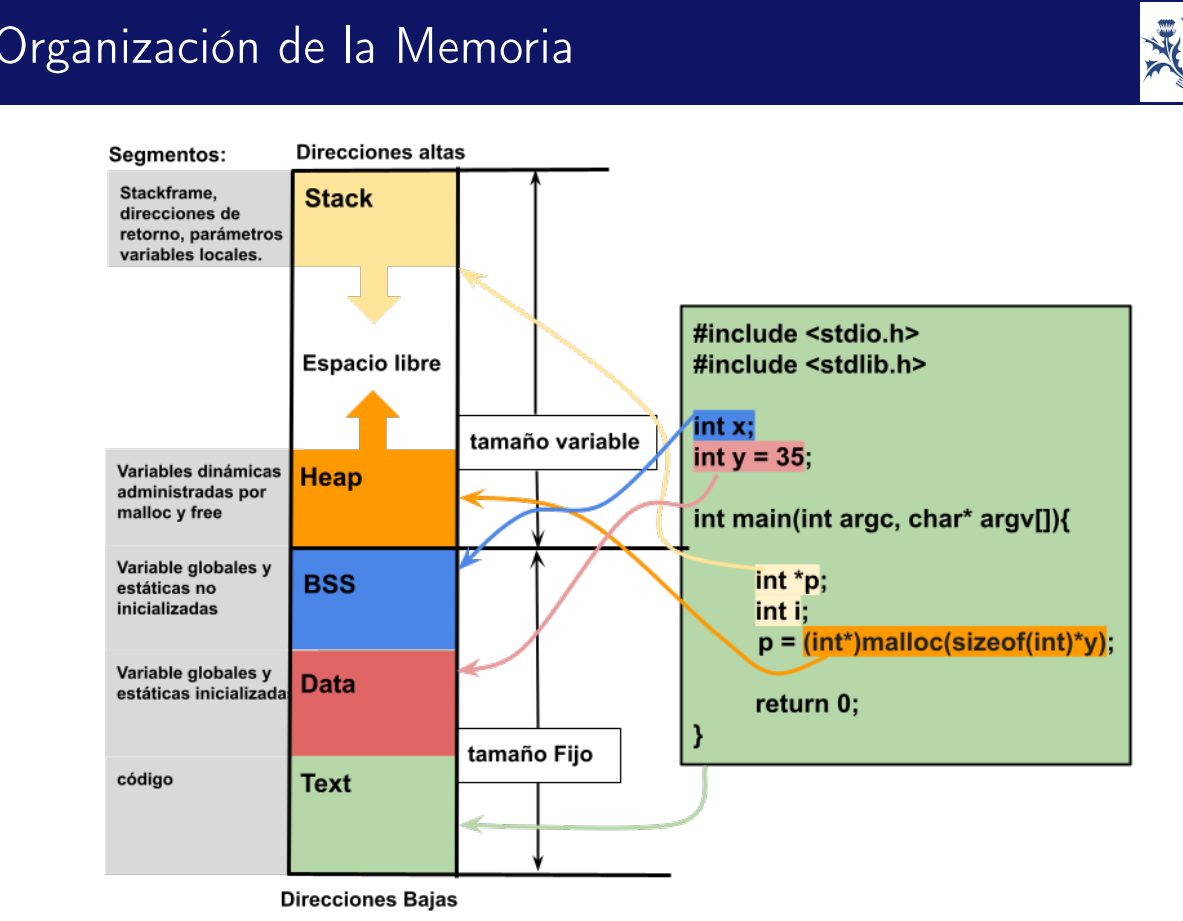

Stack: Es una parte escencial en la organizacion de la memoria de un programa, especialmente en lenguajes como C y C++.

1- Uso de la pila para llamadasa a funciones y variables locales:

- Variables locales: Cuando se llama a una funcion, la pila se utiliza para almacenar sus variables locales. Estas son variables que solo existen mientras la funcion esta en ejecucion.

- LLamadas a funciones: Cada vez que una funcion es llamada, se crea un marco de pila o stack frame que contiene la informacion necesaria para la ejecucion de esa funcion, como las variables locales y los parametros pasados a la funcion.

2- Estructura LIFO (Last in, First Out):

- Ultimo en entrar, primero en salir: La pila sigue un esquema de organizacion LIFO, donde el ultimo elemento que se coloca en la pila es el el primero en ser retirado. Este comportamiento es ideal para el manejo de llamads a funciones, ya que cuando una funcion termina su ejecucion, su marco de pila se elimina, permitiendo que se retomen las funciones anteriorres en el orden enq ue fueron llamadas.

3- Almacenamiento de informacion critica:

- Direcciones de retorno: Cuando se llama a una funcion, la direccion de retorno (es decir, la instruccion a la que se debe volver una vez que la funcion termine) se almacena en la pila. Esto asegura que el programa pueda continuar correctamente despues de que una funcion haya sido ejecutada.

- Datos de control de flujo: Además de las direcciones de retorno, la pila puede almacenar otros datos relacionados con el flujo de control, como los valores de ciertos registros del procesador que deben ser restaurados cuando la función termina.

Comportamiento de la pila en tiempos de ejecucion:

- Crecimiento y decrecimiento: La pila crece y decrece automáticamente a medida que se realizan y se completan las llamadas a funciones. Al llamar a una nueva función, se agrega un nuevo marco de pila; cuando una función termina, su marco de pila se retira.

- Stack Overflow: Si se realizan demasiadas llamadas a funciones recursivas o si se intenta almacenar demasiadas variables en la pila, se puede producir un "stack overflow", lo que ocurre cuando la pila excede su tamaño máximo permitido.

Resumen:

La pila es una estructura de memoria crucial en la ejecución de programas, utilizada para gestionar las llamadas a funciones y las variables locales. Su estructura LIFO garantiza que las funciones se ejecuten y se completen en el orden correcto. Además, almacena información esencial para la continuidad del programa, como las direcciones de retorno, lo que facilita el manejo eficiente y seguro del flujo de ejecución del programa.

Heap: Es una parte fundamental de la organizacion de la memoria en un programa.

1- Asignacion de memoria dinamica:

- Descripcion: El heap es una región de la memoria del sistema destinada a la asignación de memoria dinámica, es decir, la memoria que se asigna y libera durante la ejecución del programa, en lugar de en tiempo de compilación.

- Uso: Se utiliza principalmente cuando la cantidad de memoria necesaria no puede ser determinada de antemano, por lo que se asigna en tiempo de ejecución según sea necesario. Esto es común en estructuras de datos como listas enlazadas, árboles, y otros donde el tamaño puede crecer o decrecer dinámicamente.

2- Gestion por el programador: 

- Asignacion y Desasignacion explicita: A diferencia del stack, donde la memoria se asigna y libera automáticamente (al entrar y salir de funciones), la memoria en el heap debe ser gestionada explícitamente por el programador.

- Funciones comunes:

    - malloc: Se usa para asignar un bloque de memoria en el heap. Devuelve un puntero al inicio del bloque asignado.

    - free: Se usa para liberar un bloque de memoria previamente asignado en el heap, devolviendo esa memoria al sistema para que pueda ser reutilizada.

3- Orden de Asignacion y Desasignacion:

- Asignacion desordenada: A diferencia del stack, que sigue un orden LIFO (último en entrar, primero en salir), el heap permite la asignación y desasignación de memoria en cualquier orden. Esto significa que puedes asignar memoria en un momento y liberarla en cualquier otro, sin seguir un orden particular.

- Fragmentacion: Debido a que las asignaciones y liberaciones pueden ocurrir en cualquier orden, el heap puede sufrir de fragmentación. Esto ocurre cuando hay bloques libres de memoria dispersos entre bloques ocupados, lo que puede llevar a una situación donde, aunque haya suficiente memoria libre en total, no haya un bloque contiguo lo suficientemente grande para una nueva asignación.

- Ejemplo de fragmentacion: 

    - Si asignas y luego liberas varios bloques de diferentes tamaños en desorden, puede que termines con múltiples pequeños bloques libres, pero ninguno lo suficientemente grande para una nueva gran asignación.

Comparacion con el stack:

- Gestión Manual vs. Automática: A diferencia del stack, donde el sistema gestiona la asignación y liberación de memoria, en el heap, esta tarea recae en el programador. Esto ofrece más flexibilidad, pero también aumenta el riesgo de errores como fugas de memoria (cuando se olvida liberar memoria) o doble liberación (cuando se intenta liberar memoria que ya fue liberada).

- Uso en Programas Grandes y Complejos: El heap es esencial para programas grandes y complejos donde se necesita asignar grandes cantidades de memoria de forma dinámica y donde el tamaño de los datos puede cambiar en tiempo de ejecución.

Resumen:

El heap es una región de la memoria destinada a la asignación dinámica de memoria, gestionada explícitamente por el programador mediante funciones como malloc y free. A diferencia del stack, el heap no sigue un orden estricto de asignación y desasignación, permitiendo una mayor flexibilidad en la gestión de memoria, pero también requiriendo un manejo cuidadoso para evitar problemas como fugas de memoria o fragmentación. Es especialmente útil en situaciones donde las necesidades de memoria no pueden ser predeterminadas y pueden cambiar durante la ejecución del programa.

Data Segment:

La seccion de datos en la organizacion de la memoria es una region que se utiliza para almacenar las variables globales y estaticas que han sido inicializadas antes de que comience la ejecucion del programa. Aqui se encuentra la memoria aignada para variables que tienen un valor definido al inicio del programa y que mantienen ese valor durante toda la ejecucion, a menos que sean modificadas explicitamente.

Caracteristicas:

- Variables globales inicializadas: Las variables globales, que son declaradas fuera de cualquier funcion, y que se inicializan con un valor especifico, se almacenan en esta seccion.

- Variables estaticas inicializadas: Las variables estaticas, tanto locales como globales, que son inicializadas, tambien se colocan aqui. Estas variables retienen su valor entre diferentes llamadas a funciones o durante toda la ejecucion del programa.

- Tamanio fijo: La seccion de datos tiene un tamanio fijo determinado en tiempo de carga, ya que las variables aqui almacenadas son concoidas y fijas desde el inicio del programa.

BSS

La seccion BSS es otra region importante en la organizacion de la memoria que se utiliza para almacenar variables globales y estaticas no inicializadas. Su nombre proviene de "Block Started by Symbol", que es un termino historico utilizado en ensamblador.

Caracteristicas:

- Variables globales no inicializadas: Las variables que se declaran sin un valor inicial se almacenan en la seccion BSS.

- Variables estaticas no inicializadas: Las variables estaticas que no se inicializan explicitamente tambien se colocan aqui.

- Inicialización Automática: Aunque las variables en la sección BSS no se inicializan explícitamente en el código, el sistema se encarga de inicializarlas automáticamente con un valor nulo (cero) al inicio del programa.

- Tamaño en Memoria: A diferencia de la sección de datos, la sección BSS no almacena los valores iniciales de las variables, solo la cantidad de espacio que ocupan. Esto significa que en el archivo ejecutable, esta sección no ocupa espacio con datos concretos, sino que simplemente reserva espacio en memoria que se llenará con ceros en tiempo de ejecución.

Resumen de Diferencias:

Sección de Datos: Almacena variables globales y estáticas que han sido inicializadas con un valor específico en el código. Estas variables mantienen su valor inicial hasta que se modifiquen durante la ejecución del programa.

Sección BSS: Almacena variables globales y estáticas no inicializadas. Estas variables son automáticamente inicializadas a cero por el sistema. La sección BSS no ocupa espacio en el archivo ejecutable con valores iniciales, sino solo con la cantidad de memoria que será reservada en tiempo de ejecución.

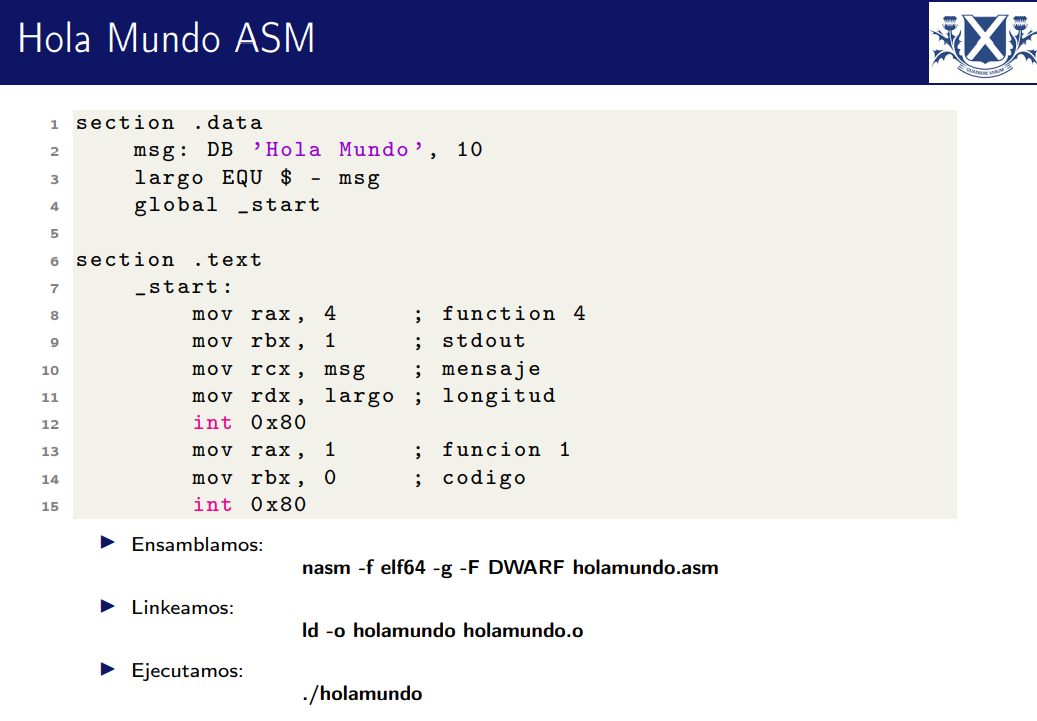

---

Tipos de datos en C

1. Tipos Atómicos

- int: Representa números enteros. Es el tipo de datos básico para almacenar valores enteros, que pueden ser positivos, negativos o cero.
    - Ejemplo: int edad = 25;

- char: Se utiliza para almacenar un solo carácter. Es un tipo de datos entero de 1 byte, que generalmente representa caracteres en la tabla ASCII.
    - Ejemplo: char letra = 'A';

- float: Representa números en punto flotante de precisión simple. Se utiliza para almacenar valores decimales con una precisión de aproximadamente 7 dígitos.
    
    - Ejemplo: float precio = 19.99;

- double: Similar a float, pero con doble precisión. Puede almacenar números decimales con mayor precisión, generalmente alrededor de 15 dígitos significativos.

    - Ejemplo: double distancia = 12345.6789;

2. Arreglos (Arrays)

- Descripción: Un arreglo es una colección de elementos del mismo tipo de datos almacenados en ubicaciones de memoria contiguas. Los arreglos pueden ser de tipos de datos atómicos como int, char, float, double, o incluso de otros tipos como estructuras.

    - Ejemplo: int numeros[5] = {1, 2, 3, 4, 5}; define un arreglo de 5 enteros.

3. Estructuras (Structs)

-   Descripción: Una estructura es un tipo de datos compuesto que permite agrupar diferentes tipos de datos bajo un mismo nombre. Es útil para representar un objeto que tiene múltiples atributos.
    
4. Punteros (Pointers)

- Descripción: Un puntero es una variable que almacena la dirección de memoria de otra variable. Los punteros son fundamentales en C para la manipulación de arrays, estructuras dinámicas, y funciones.

    - Ejemplo: int *p; define un puntero a un entero. Si int x = 10;, puedes asignar p = &x;, donde &x es la dirección de x.

---
**Estructuras**

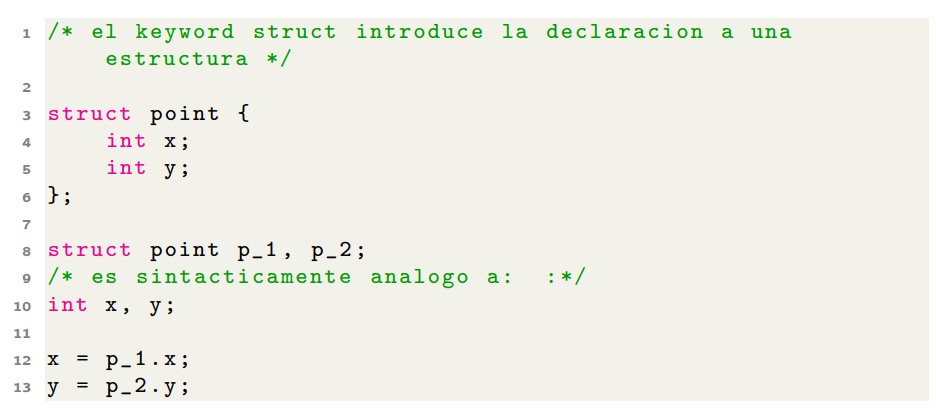

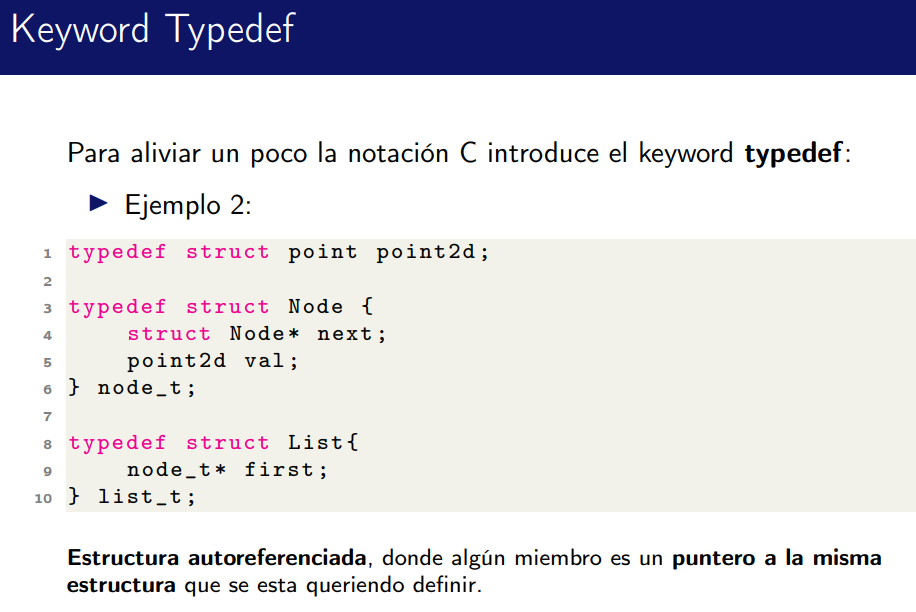

**Ejemplo sin typedef:**

In [ ]:
struct Persona {
    char nombre[50];
    int edad;
    float altura;
};

int main() {
    struct Persona p1; // Declaración de una variable de tipo struct Persona
    return 0;
}

**Ejemplo con typedef:**

In [ ]:
typedef struct {
    char nombre[50];
    int edad;
    float altura;
} Persona;

int main() {
    Persona p1; // Ahora se puede declarar directamente sin la palabra clave struct
    return 0;
}

**Punteros a Estructuras**

Un puntero a una estructura es simplemente un puntero que apunta a una variable de tipo estructura. Esto es útil cuando deseas manipular estructuras grandes sin tener que copiar toda la estructura en memoria, lo que mejora la eficiencia.

In [ ]:

#include <stdio.h>

struct Persona {
    char nombre[50];
    int edad;
};

int main() {
    struct Persona p1 = {"Juan", 30};
    struct Persona *ptr = &p1; // ptr apunta a la estructura p1

    // Acceso a miembros de la estructura mediante el puntero
    printf("Nombre: %s\n", ptr->nombre);
    printf("Edad: %d\n", ptr->edad);

    return 0;
}


En este ejemplo, ptr es un puntero que apunta a la estructura p1. Puedes acceder a los miembros de la estructura a través del puntero usando el operador de flecha (->).

**Estructuras Autorreferenciadas**

Las estructuras autorreferenciadas son estructuras que contienen un puntero a una estructura del mismo tipo. Esto es esencial para construir estructuras de datos dinámicas como listas enlazadas, donde cada nodo de la lista necesita apuntar al siguiente nodo.

In [ ]:
#include <stdio.h>
#include <stdlib.h>

struct Nodo {
    int dato;
    struct Nodo *siguiente; // Puntero a otra estructura del mismo tipo
};

int main() {
    // Creación de nodos
    struct Nodo *nodo1 = (struct Nodo *)malloc(sizeof(struct Nodo));
    struct Nodo *nodo2 = (struct Nodo *)malloc(sizeof(struct Nodo));
    
    nodo1->dato = 10;
    nodo1->siguiente = nodo2;

    nodo2->dato = 20;
    nodo2->siguiente = NULL; // Último nodo, no apunta a ningún otro nodo

    // Acceso a los datos
    printf("Dato en nodo1: %d\n", nodo1->dato);
    printf("Dato en nodo2: %d\n", nodo2->dato);

    // Liberar memoria
    free(nodo1);
    free(nodo2);

    return 0;
}


En este ejemplo, struct Nodo es una estructura autorreferenciada porque contiene un puntero siguiente que apunta a otro Nodo. Esto permite crear una cadena de nodos, lo que es la base para estructuras de datos dinámicas como listas enlazadas.

Aplicaciones Comunes de Estructuras Autorreferenciadas

- Listas Enlazadas: Una lista enlazada es una colección de nodos donde cada nodo apunta al siguiente. La estructura autorreferenciada es ideal para este propósito.

- Árboles Binarios: En un árbol binario, cada nodo apunta a dos nodos hijos (izquierdo y derecho), lo que se implementa comúnmente con estructuras autorreferenciadas.

- Grafos: En la representación de grafos, un nodo puede tener punteros a varios otros nodos, y esto se gestiona a menudo con estructuras autorreferenciadas.

Consideraciones Importantes

- Gestión de Memoria: Al trabajar con estructuras autorreferenciadas, es crucial gestionar correctamente la memoria, especialmente cuando se asigna y libera memoria dinámica utilizando funciones como malloc y free.

- Recursividad: Debido a la naturaleza autorreferenciada, estas estructuras se prestan bien a algoritmos recursivos, como recorrer una lista enlazada o un árbol.

Resumen:

Los punteros a estructuras permiten manipular estructuras de manera eficiente en C, mientras que las estructuras autorreferenciadas son esenciales para implementar estructuras de datos dinámicas como listas enlazadas y árboles. Las estructuras autorreferenciadas contienen punteros a otras estructuras del mismo tipo, lo que permite construir cadenas o árboles de nodos. Estos conceptos son fundamentales para la manipulación dinámica de datos y la implementación de algoritmos complejos en C.

---

**Punteros** 

Los punteros son una característica fundamental y poderosa en C, que te permiten trabajar directamente con las direcciones de memoria. Aquí te explicaré qué son los punteros, cómo funcionan, y te mostraré algunos ejemplos básicos para ilustrar su uso.

¿Qué es un Puntero?

Un puntero es una variable que almacena la dirección de memoria de otra variable. En lugar de contener un valor específico (como un número o un carácter), un puntero contiene la dirección de una ubicación en la memoria donde se almacena un valor.

Declaración de un Puntero

Para declarar un puntero, se utiliza el tipo de dato seguido de un asterisco (*). El tipo de dato indica el tipo de variable a la que el puntero puede apuntar.


In [ ]:
int *ptr;   // Puntero a un entero
char *cptr; // Puntero a un carácter
float *fptr; // Puntero a un flotante

**Asignación de una Dirección a un Puntero**

Puedes asignar a un puntero la dirección de una variable utilizando el operador de dirección (&).

In [ ]:
int x = 10;
int *ptr = &x; // ptr ahora contiene la dirección de la variable x

**Acceso a la Variable Apuntada (Desreferenciar)**

Para acceder al valor de la variable a la que apunta un puntero, se utiliza el operador de desreferencia (*).

In [ ]:
int x = 10;
int *ptr = &x;

printf("El valor de x es: %d\n", *ptr); // Esto imprime el valor de x (10)


**Ejemplo Completo con Explicaciones**

In [ ]:
#include <stdio.h>

int main() {
    int x = 10;    // Una variable entera
    int *ptr = &x; // Un puntero que almacena la dirección de x

    printf("Valor de x: %d\n", x);          // Imprime el valor de x
    printf("Dirección de x: %p\n", &x);     // Imprime la dirección de x
    printf("Valor de ptr: %p\n", ptr);      // Imprime el valor de ptr (la dirección de x)
    printf("Valor al que apunta ptr: %d\n", *ptr); // Imprime el valor al que apunta ptr (el valor de x)

    // Modificando el valor de x a través del puntero
    *ptr = 20;

    printf("Nuevo valor de x: %d\n", x);    // Imprime el nuevo valor de x (20)

    return 0;
}

**Explicación del Ejemplo**

1- Declaración y Asignación:

- int x = 10; crea una variable entera x y le asigna el valor 10.

- int *ptr = &x; declara un puntero ptr y le asigna la dirección de x utilizando &x.

2- Impresión de Valores y Direcciones:

- printf("Valor de x: %d\n", x); imprime el valor de x directamente.

- printf("Dirección de x: %p\n", &x); imprime la dirección de x en la memoria.

- printf("Valor de ptr: %p\n", ptr); imprime el valor de ptr, que es la dirección de x.

- printf("Valor al que apunta ptr: %d\n", *ptr); desreferencia el puntero ptr para acceder al valor almacenado en la dirección que ptr contiene (que es el valor de x).

3- Modificación del Valor a través del Puntero:

- *ptr = 20; cambia el valor de x a 20 utilizando el puntero ptr. Esto demuestra que puedes modificar el valor de una variable indirectamente a través de un puntero.

4- Resultado:

- Después de modificar x a través del puntero, imprimir x mostrará el nuevo valor 20.

**Aplicaciones Comunes de Punteros**

1- Paso de Parámetros por Referencia: Los punteros se utilizan para pasar la dirección de variables a funciones, permitiendo que las funciones modifiquen los valores de las variables originales.

2- Manejo de Memoria Dinámica: Punteros son esenciales para trabajar con memoria dinámica (usando malloc, calloc, realloc, y free).

3- Manipulación de Arreglos y Cadenas: Dado que los arreglos y las cadenas son esencialmente bloques de memoria contiguos, los punteros son ideales para manipularlos eficientemente.

4- Estructuras de Datos Dinámicas: Estructuras como listas enlazadas, árboles, y grafos dependen en gran medida del uso de punteros para crear y gestionar nodos dinámicamente.

**Aritmetica de punteros**

La aritmética de punteros en C es una característica poderosa que permite realizar operaciones matemáticas con punteros para manipular direcciones de memoria de manera controlada y eficiente.

1- Suma

- Descripción: Cuando sumas un valor entero a un puntero, el puntero se desplaza en la memoria. Este desplazamiento depende del tipo de datos al que apunta el puntero. Es decir, el incremento se realiza en múltiplos del tamaño del tipo de dato.

- Ejemplo:


In [ ]:
int arr[5] = {1, 2, 3, 4, 5};
int *ptr = arr; // ptr apunta al primer elemento del arreglo

ptr = ptr + 1; // Ahora, ptr apunta al segundo elemento del arreglo
printf("El valor al que apunta ptr: %d\n", *ptr); // Imprime 2

En este ejemplo, al sumar 1 a ptr, se mueve al siguiente elemento del arreglo. Si ptr apunta a un int y el tamaño de int es 4 bytes, entonces ptr + 1 apunta a 4 bytes más adelante en la memoria.

2- Resta

- Descripción: La resta de un valor entero a un puntero disminuye la dirección de memoria a la que apunta el puntero. Al igual que con la suma, el decremento depende del tamaño del tipo de dato al que apunta el puntero.

- Ejemplo:


In [ ]:
int arr[5] = {1, 2, 3, 4, 5};
int *ptr = &arr[2]; // ptr apunta al tercer elemento del arreglo

ptr = ptr - 1; // Ahora, ptr apunta al segundo elemento del arreglo
printf("El valor al que apunta ptr: %d\n", *ptr); // Imprime 2

En este caso, restar 1 a ptr hace que el puntero se desplace hacia atrás en la memoria, apuntando al elemento anterior en el arreglo.

3- Diferencia entre Punteros

- Descripción: La diferencia entre dos punteros del mismo tipo indica el número de elementos del tipo apuntado que hay entre ellos. No se mide en bytes, sino en el número de elementos de ese tipo.

- Ejemplo:

In [ ]:
int arr[5] = {1, 2, 3, 4, 5};
int *ptr1 = &arr[0]; // Apunta al primer elemento
int *ptr2 = &arr[3]; // Apunta al cuarto elemento

int diff = ptr2 - ptr1; // Calcula la diferencia entre ptr2 y ptr1
printf("La diferencia entre ptr2 y ptr1: %d\n", diff); // Imprime 3


Aquí, ptr2 - ptr1 devuelve 3, que es el número de elementos int entre ptr1 y ptr2. No se trata de la diferencia en bytes, sino de la diferencia en términos de elementos del tipo apuntado

Consideraciones Importantes:

- Compatibilidad de Tipos: La aritmética de punteros solo es segura y significativa cuando se realiza en punteros que apuntan a tipos de datos compatibles (por ejemplo, ambos punteros apuntan a int).

- Límites de Memoria: Debes tener cuidado al realizar aritmética de punteros para no exceder los límites de la memoria asignada. Intentar acceder a memoria fuera de los límites del arreglo (como sumando o restando demasiados elementos) puede causar comportamiento indefinido, incluyendo fallos de segmentación.

---
**Cast: Conversion de tipos**

El cast en C es una técnica que permite convertir explícitamente una variable de un tipo de dato a otro. Esta conversión puede ser necesaria cuando deseas realizar operaciones entre diferentes tipos de datos, o cuando quieres aprovechar ciertas características de un tipo específico de dato. A continuación, te explico cómo funciona el cast, los tipos de cast y algunos ejemplos comunes.

**Tipos de Cast en C**

1- Cast Implícito (Conversión Automática)

- Ocurre automáticamente cuando se realizan operaciones entre diferentes tipos de datos. El compilador convierte automáticamente uno de los tipos de datos al otro tipo más amplio (por ejemplo, de int a float).

- Ejemplo:


In [ ]:
int x = 10;
float y = 5.5;
float result = x + y; // x es convertido automáticamente a float

2- Cast explicito

- Es cuando el programador convierte explícitamente un tipo de dato a otro utilizando el operador de cast. Esto se hace para asegurar que la conversión se realice de la manera deseada y puede evitar errores de tipo.

- Ejemplo:


In [ ]:
int x = 10;
float y = (float)x; // Convertimos explícitamente x a float

**Ejemplos de Cast Explicito**

1- Conversion entre tipos numericos

- Ejemplo: Convertir un float a int

In [ ]:
float pi = 3.14159;
int valor_entero = (int)pi; // El valor será truncado a 3


2- Conversion entre tipos de punteros

- Ejemplo: Convertir un puntero a void* a otro tipo de puntero.

In [ ]:
void *ptr;
int x = 10;
ptr = &x;
int *int_ptr = (int*)ptr; // Convertimos ptr de void* a int*
printf("Valor de x a través de int_ptr: %d\n", *int_ptr);

3- Cast entre Enteros y Caracteres

- Ejemplo: Convertir un int a char

In [ ]:
int codigo_ascii = 65;
char letra = (char)codigo_ascii; // letra será 'A'


4- Cast en operaciones de division

- Ejemplo: Evitar la division truncada entre enteros

In [ ]:
int a = 5, b = 2;
float resultado = (float)a / b; // resultado será 2.5

---

**Tipo void***

En C, el tipo void* es un puntero genérico que puede apuntar a cualquier tipo de dato. Es uno de los tipos de puntero más poderosos y flexibles, ya que permite trabajar con direcciones de memoria sin conocer el tipo de dato específico al que apunta.

**Características del Tipo void***

1- Puntero Genérico:

- void* es un puntero que no tiene un tipo específico. Puede apuntar a cualquier tipo de dato, ya sea un int, char, float, una estructura, etc.

- Ejemplo:



In [ ]:
void *ptr;
int x = 10;
ptr = &x; // ptr ahora apunta a una variable int

2- No se Puede Desreferenciar Directamente:

- Dado que void* no tiene un tipo específico, no se puede desreferenciar directamente para acceder al valor al que apunta. Antes de desreferenciar un puntero void*, debe convertirse (cast) al tipo de dato adecuado.

- Ejemplo:

In [ ]:
void *ptr;
int x = 10;
ptr = &x;
// printf("%d\n", *ptr); // Error: no se puede desreferenciar un void*
printf("%d\n", *(int*)ptr); // Correcto: convertimos ptr a int* y luego lo desreferenciamos


3- Uso comun en funciones genericas:

- void* se utiliza a menudo en funciones que necesitan trabajar con diferentes tipos de datos sin conocer su tipo en tiempo de compilación. Es común en funciones como malloc, que devuelve un puntero genérico que luego el programador debe convertir al tipo adecuado.

- Ejemplo con malloc:

In [ ]:
int *arr = (int*)malloc(5 * sizeof(int)); // malloc devuelve un void* que se convierte a int*


4- Estructuras de Datos Flexibles

- En la implementación de estructuras de datos como listas enlazadas, pilas, o colas que necesitan almacenar datos de diferentes tipos, void* permite crear nodos que pueden apuntar a cualquier tipo de dato.

- Ejemplo:

In [ ]:
struct Nodo {
    void *dato; // Puede apuntar a cualquier tipo de dato
    struct Nodo *siguiente;
};

**Ejemplos de uso de void***


In [ ]:
void imprimirEntero(void *ptr) {
    printf("El valor es: %d\n", *(int*)ptr);
}

int main() {
    int x = 42;
    imprimirEntero(&x);
    return 0;
}

int comparar(const void *a, const void *b) {
    return (*(int*)a - *(int*)b);
}

int main() {
    int arr[] = {5, 2, 8, 3, 1};
    qsort(arr, 5, sizeof(int), comparar);
    for(int i = 0; i < 5; i++) {
        printf("%d ", arr[i]);
    }
    return 0;
}


---

**Punteros a Funciones**

En C, los punteros a funciones son un tipo especial de puntero que puede almacenar la dirección de una función. Esto permite realizar operaciones flexibles y dinámicas con funciones, como asignarlas a variables, almacenarlas en arreglos, pasarlas como argumentos a otras funciones, o incluso devolverlas desde funciones. Aquí te explico cómo funcionan los punteros a funciones, cómo se declaran, y cómo se utilizan con ejemplos prácticos.

**Declaración de un Puntero a Función**

Para declarar un puntero a función, debes especificar el tipo de retorno de la función, seguido por un asterisco *, y luego el nombre del puntero a función entre paréntesis. Después de los paréntesis, debes especificar los tipos de los argumentos que la función acepta.

Ejemplo de Declaración:

In [ ]:
int (*funcPtr)(int, int);

**Asignación de una Función a un Puntero a Función**

Una vez que tienes un puntero a función declarado, puedes asignarle la dirección de una función existente que coincida con la firma (tipo de retorno y argumentos) del puntero.

Ejemplo de Asignación:

In [ ]:
int sumar(int a, int b) {
    return a + b;
}

int (*funcPtr)(int, int) = sumar; // Asignar la dirección de la función sumar a funcPtr


**Invocación de una Función a través de un Puntero a Función**

Para llamar a una función a través de un puntero, utilizas el nombre del puntero como si fuera el nombre de la función. También puedes utilizar la sintaxis (*funcPtr)(args).

Ejemplo de Invocación:

In [ ]:
int resultado = funcPtr(3, 4); // Llama a la función sumar(3, 4) a través de funcPtr
printf("El resultado es: %d\n", resultado);


**Uso Común: Paso de Funciones como Parámetros**

Una de las aplicaciones más poderosas de los punteros a funciones es la capacidad de pasar funciones como argumentos a otras funciones. Esto es especialmente útil en funciones de orden superior, como en algoritmos de clasificación (qsort) o en callbacks.

Ejemplo: Pasando Funciones como Parámetros

In [ ]:
#include <stdio.h>

int sumar(int a, int b) {
    return a + b;
}

int restar(int a, int b) {
    return a - b;
}

int operar(int x, int y, int (*operacion)(int, int)) {
    return operacion(x, y); // Llama a la función apuntada por operacion
}

int main() {
    int a = 10, b = 5;
    
    int resultado1 = operar(a, b, sumar); // Pasar la función sumar
    int resultado2 = operar(a, b, restar); // Pasar la función restar
    
    printf("Suma: %d\n", resultado1);   // Imprime 15
    printf("Resta: %d\n", resultado2);  // Imprime 5
    
    return 0;
}


**Arreglos de Punteros a Funciones**

Puedes crear un arreglo de punteros a funciones, lo que te permite almacenar diferentes funciones en una estructura que puede ser recorrida o utilizada dinámicamente.

Ejemplo de Arreglo de Punteros a Funciones:

In [ ]:
#include <stdio.h>

int sumar(int a, int b) { return a + b; }
int restar(int a, int b) { return a - b; }
int multiplicar(int a, int b) { return a * b; }

int main() {
    int (*operaciones[3])(int, int) = {sumar, restar, multiplicar}; // Arreglo de punteros a funciones
    
    int x = 10, y = 5;
    
    for (int i = 0; i < 3; i++) {
        printf("Resultado: %d\n", operaciones[i](x, y)); // Llama a cada función del arreglo
    }
    
    return 0;
}


**Devolviendo Punteros a Funciones desde Funciones**

También puedes hacer que una función devuelva un puntero a función. Esto es útil en situaciones donde la función que deseas ejecutar depende de cierta lógica.

Ejemplo de Función que Devuelve un Puntero a Función:

In [ ]:
#include <stdio.h>

int sumar(int a, int b) { return a + b; }
int restar(int a, int b) { return a - b; }

int (*seleccionarOperacion(char operador))(int, int) {
    if (operador == '+')
        return sumar;
    else if (operador == '-')
        return restar;
    else
        return NULL; // Retorna NULL si el operador no es reconocido
}

int main() {
    int x = 10, y = 5;
    
    int (*operacion)(int, int) = seleccionarOperacion('+');
    if (operacion != NULL) {
        printf("Resultado: %d\n", operacion(x, y)); // Imprime 15
    }
    
    return 0;
}


---

**Keyword Extern**

La palabra clave extern en C es utilizada para declarar una variable o una función que se define en otro archivo fuente. Esto es particularmente útil en proyectos que constan de múltiples archivos fuente, donde necesitas acceder a variables o funciones globales definidas en un archivo desde otro archivo. A continuación, te explico en detalle cómo funciona extern, su uso en la declaración y definición de variables y funciones, y su importancia en la construcción de programas modulares.

Uso de extern para Variables

Cuando tienes una variable global definida en un archivo fuente y deseas utilizarla en otro archivo fuente, necesitas declarar la variable con extern en el segundo archivo. Esto le indica al compilador que la variable existe y está definida en otro lugar, pero no asigna memoria para la variable en ese archivo.

**Definicion de una variable**

In [ ]:
// file1.c
int contador = 10;  // Definición de la variable; memoria asignada aquí


**Declaracion de una variable con extern**

In [ ]:
// file2.c
extern int contador;  // Declaración de la variable; no se asigna memoria

void incrementarContador() {
    contador++;
}


**Uso de extern para Funciones**

De manera similar a las variables, extern se puede utilizar para declarar funciones que están definidas en otro archivo fuente. Sin embargo, a diferencia de las variables, las funciones se declaran implícitamente como extern cuando las declaras con su prototipo en un archivo de cabecera (.h) o en otro archivo fuente.

**Definición de una Función (en file1.c):**

In [ ]:
// file1.c
void saludar() {
    printf("Hola, mundo!\n");
}

**Declaracion de una funcion con extern**

In [ ]:
// file2.c
extern void saludar();  // Declaración de la función

int main() {
    saludar();  // Llamada a la función definida en file1.c
    return 0;
}

**Diferencia entre Definición y Declaración**

- Declaración: Informa al compilador que existe una variable o función con un determinado tipo, pero no asigna memoria ni implementa la lógica. La declaración se usa para hacer que una variable o función definida en otro archivo esté disponible en el archivo actual.

- Definición: Asigna memoria para una variable o proporciona la implementación de una función. Una variable o función debe definirse una sola vez en todo el programa, mientras que puede ser declarada múltiples veces.

---

**Parametros de main: arcv y argv